In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading datasets

In [70]:
import chardet

# Read the file contents as bytes
with open(r"C:\Users\uset\Desktop\Ski_Resorts\resorts.csv", 'rb') as f:
    data = f.read()

# Detect the encoding of the bytes
result = chardet.detect(data)

print(result['encoding'])

Windows-1252


In [71]:
snow = pd.read_csv(r"C:\Users\uset\Desktop\Ski_Resorts\snow.csv")
resorts = pd.read_csv(r"C:\Users\uset\Desktop\Ski_Resorts\resorts.csv", encoding='Windows-1252')
data_dict = pd.read_csv(r"C:\Users\uset\Desktop\Ski_Resorts\data_dictionary.csv",encoding='Windows-1252')

Feature engineering & Cleaning

In [72]:
print(f"Snow data shape: {snow.shape}")
print(f"Resorts data shape{resorts.shape}")

Snow data shape: (820522, 4)
Resorts data shape(499, 25)


In [73]:
snow.sample(n=2,random_state=42)

,Month,Latitude,Longitude,Snow
787074,2022-01-01,49.375,16.125,66.54
710427,2022-02-01,43.125,-121.625,94.88


In [74]:
snow.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Month      820522 non-null  object 
 1   Latitude   820522 non-null  float64
 2   Longitude  820522 non-null  float64
 3   Snow       820522 non-null  float64
dtypes: float64(3), object(1)
memory usage: 71.2 MB


In [75]:
snow["month"] = pd.to_datetime(snow["Month"], format="%Y-%m-%d").dt.month 

snow.drop(columns=["Month"],inplace=True)

snow.rename(columns=str.lower, inplace=True)

new_order = ["month","latitude","longitude","snow"]

snow = snow[new_order]

In [76]:
snow.sample(n=5,random_state=42)

,month,latitude,longitude,snow
787074,1,49.375,16.125,66.54
710427,2,43.125,-121.625,94.88
528923,3,68.125,-89.375,100.00
302879,6,79.875,-44.125,100.00
773003,1,53.875,46.375,100.00


In [77]:
snow.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   month      820522 non-null  int64  
 1   latitude   820522 non-null  float64
 2   longitude  820522 non-null  float64
 3   snow       820522 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 25.0 MB


In [78]:
resorts.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Season', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing'],
      dtype='object')

In [79]:
resorts.drop(columns=["ID"],inplace=True)
resorts.columns = resorts.columns.str.replace(" ","_").str.lower()

In [80]:
resorts.columns

Index(['resort', 'latitude', 'longitude', 'country', 'continent', 'price',
       'season', 'highest_point', 'lowest_point', 'beginner_slopes',
       'intermediate_slopes', 'difficult_slopes', 'total_slopes',
       'longest_run', 'snow_cannons', 'surface_lifts', 'chair_lifts',
       'gondola_lifts', 'total_lifts', 'lift_capacity', 'child_friendly',
       'snowparks', 'nightskiing', 'summer_skiing'],
      dtype='object')

In [81]:
snow.columns

Index(['month', 'latitude', 'longitude', 'snow'], dtype='object')

Memory management

In [82]:
snow.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   month      820522 non-null  int64  
 1   latitude   820522 non-null  float64
 2   longitude  820522 non-null  float64
 3   snow       820522 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 25.0 MB


In [83]:
resorts.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resort               499 non-null    object 
 1   latitude             499 non-null    float64
 2   longitude            499 non-null    float64
 3   country              499 non-null    object 
 4   continent            499 non-null    object 
 5   price                499 non-null    int64  
 6   season               499 non-null    object 
 7   highest_point        499 non-null    int64  
 8   lowest_point         499 non-null    int64  
 9   beginner_slopes      499 non-null    int64  
 10  intermediate_slopes  499 non-null    int64  
 11  difficult_slopes     499 non-null    int64  
 12  total_slopes         499 non-null    int64  
 13  longest_run          499 non-null    int64  
 14  snow_cannons         499 non-null    int64  
 15  surface_lifts        499 non-null    int

In [84]:
def memory_management(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type == np.object:
            df[col] = df[col].astype('category')
        elif col_type != np.datetime64:
            c_min, c_max = df[col].min(), df[col].max()
            for dtype in [np.int8, np.int16, np.int32, np.int64]:
                if c_min > np.iinfo(dtype).min and c_max < np.iinfo(dtype).max:
                    df[col] = df[col].astype(dtype)
                    break
    return df

df_memory_snow = memory_management(snow.copy())
df_memory_resorts = memory_management(resorts.copy())


In [85]:
df_memory_resorts.info(memory_usage="deep")
# memory usage dropped from 316.4 KB 82.6 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   resort               499 non-null    category
 1   latitude             499 non-null    int8    
 2   longitude            499 non-null    int16   
 3   country              499 non-null    category
 4   continent            499 non-null    category
 5   price                499 non-null    int16   
 6   season               499 non-null    category
 7   highest_point        499 non-null    int16   
 8   lowest_point         499 non-null    int16   
 9   beginner_slopes      499 non-null    int16   
 10  intermediate_slopes  499 non-null    int16   
 11  difficult_slopes     499 non-null    int8    
 12  total_slopes         499 non-null    int16   
 13  longest_run          499 non-null    int8    
 14  snow_cannons         499 non-null    int16   
 15  surface_lifts        49

In [86]:
df_memory_snow.info(memory_usage="deep")
# memory usage dropped from 25.0 MB to 3.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   month      820522 non-null  int8 
 1   latitude   820522 non-null  int8 
 2   longitude  820522 non-null  int16
 3   snow       820522 non-null  int8 
dtypes: int16(1), int8(3)
memory usage: 3.9 MB


In [87]:
df_memory_resorts.select_dtypes("category").nunique()

resort            499
country            38
continent           5
season             31
child_friendly      2
snowparks           2
nightskiing         2
summer_skiing       2
dtype: int64

Checking for null values

In [88]:
df_memory_resorts.duplicated().sum()

0

In [89]:
df_memory_resorts.isna().sum()

resort                 0
latitude               0
longitude              0
country                0
continent              0
price                  0
season                 0
highest_point          0
lowest_point           0
beginner_slopes        0
intermediate_slopes    0
difficult_slopes       0
total_slopes           0
longest_run            0
snow_cannons           0
surface_lifts          0
chair_lifts            0
gondola_lifts          0
total_lifts            0
lift_capacity          0
child_friendly         0
snowparks              0
nightskiing            0
summer_skiing          0
dtype: int64

In [90]:
df_memory_snow.duplicated().sum()

524128

In [91]:
df_memory_snow.isna().sum()

month        0
latitude     0
longitude    0
snow         0
dtype: int64

In [92]:
df_memory_resorts.describe()

,latitude,longitude,price,highest_point,lowest_point,beginner_slopes,intermediate_slopes,difficult_slopes,total_slopes,longest_run,snow_cannons,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,42.749499,-6.286573,48.721443,2160.589178,1200.631263,31.819639,37.921844,16.164329,85.905812,3.545090,179.136273,11.282565,9.721443,3.258517,24.262525,31650.961924
std,15.814289,59.628165,21.718733,774.339805,596.142294,47.401764,44.358524,20.115855,100.874157,3.947887,372.321111,13.365360,11.461502,5.867967,27.672736,40781.986019
min,-45.000000,-149.000000,0.000000,163.000000,36.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,1.000000,36.000000,1594.000000,800.000000,10.000000,12.000000,3.000000,30.000000,0.000000,0.000000,3.000000,3.000000,0.000000,10.000000,11645.000000
50%,46.000000,8.000000,45.000000,2175.000000,1121.000000,18.000000,25.000000,9.000000,55.000000,3.000000,15.000000,7.000000,6.000000,1.000000,15.000000,18510.000000
75%,47.000000,12.000000,54.000000,2700.000000,1500.000000,30.000000,45.000000,21.000000,100.000000,6.000000,180.000000,14.000000,11.500000,4.000000,26.000000,32829.000000
max,67.000000,176.000000,141.000000,3914.000000,3286.000000,312.000000,239.000000,126.000000,600.000000,16.000000,2383.000000,89.000000,74.000000,40.000000,174.000000,252280.000000


In [93]:
df_memory_resorts.describe(include="category")

,resort,country,continent,season,child_friendly,snowparks,nightskiing,summer_skiing
count,499,499,499,499,499,499,499,499
unique,499,38,5,31,2,2,2,2
top,49 Degrees North Mountain Resort,Austria,Europe,December - April,Yes,Yes,No,No
freq,1,89,360,220,495,378,295,470


Exploratory data analysis (EDA)

In [94]:
analysis_snow = df_memory_snow.copy()
analysis_resorts = df_memory_resorts.copy()

In [95]:
analysis_resorts.head(n=3)

,resort,latitude,longitude,country,continent,price,season,highest_point,lowest_point,beginner_slopes,...,snow_cannons,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,child_friendly,snowparks,nightskiing,summer_skiing
0,Hemsedal,60,8,Norway,Europe,46,November - May,1450,620,29,...,325,15,6,0,21,22921,Yes,Yes,Yes,No
1,Geilosiden Geilo,60,8,Norway,Europe,44,November - April,1178,800,18,...,100,18,6,0,24,14225,Yes,Yes,Yes,No
2,Golm,47,9,Austria,Europe,48,December - April,2110,650,13,...,123,4,4,3,11,16240,Yes,No,No,No


In [96]:
analysis_snow.head(n=3)

,month,latitude,longitude,snow
0,12,63,68,95
1,12,63,69,100
2,12,63,69,100


In [97]:
snow_bar = analysis_snow.groupby("month")["snow"].agg([("total_snow","sum"),("average_snow","mean"),("std_snow","std"),("skew_snow","skew")]).reset_index()

In [98]:
snow_bar

,month,total_snow,average_snow,std_snow,skew_snow
0,1,7766964,82.918373,33.077791,-1.661301
1,2,9873740,87.155328,29.703602,-2.121396
2,3,9583293,87.194564,29.752628,-2.130367
3,4,7869341,81.665207,34.317345,-1.516162
4,5,5194502,70.250085,36.785350,-0.741218
5,6,2003805,60.003144,42.300214,-0.328902
6,7,1255431,58.137955,44.846932,-0.264577
7,8,1189805,60.633186,44.757138,-0.385521
8,9,1872620,52.576579,41.702866,0.007656
9,10,4789761,72.479889,37.536782,-0.880802


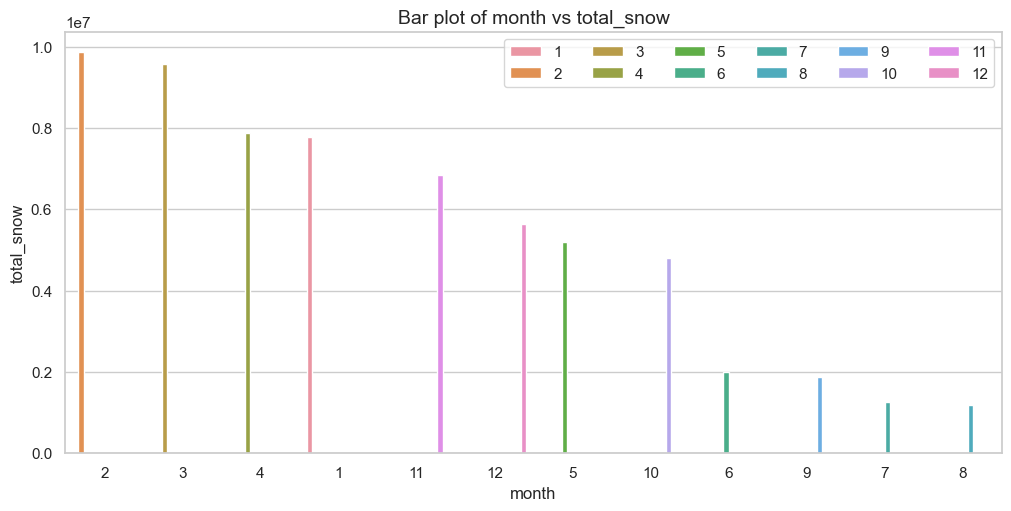

In [99]:
fig,ax = plt.subplots(figsize=(10,5),constrained_layout=True)
my_order = snow_bar.sort_values("total_snow", ascending=False)['month']
sns.barplot(data=snow_bar,x="month",y="total_snow",hue="month",order=my_order)
ax.set_title(f"Bar plot of month vs total_snow",fontsize=14)
plt.legend(loc="upper right",ncol=6)

Observations

Based on the observations on the bar chart by months, the top five months with the highest amount of snow are;

February
March
April
January
November

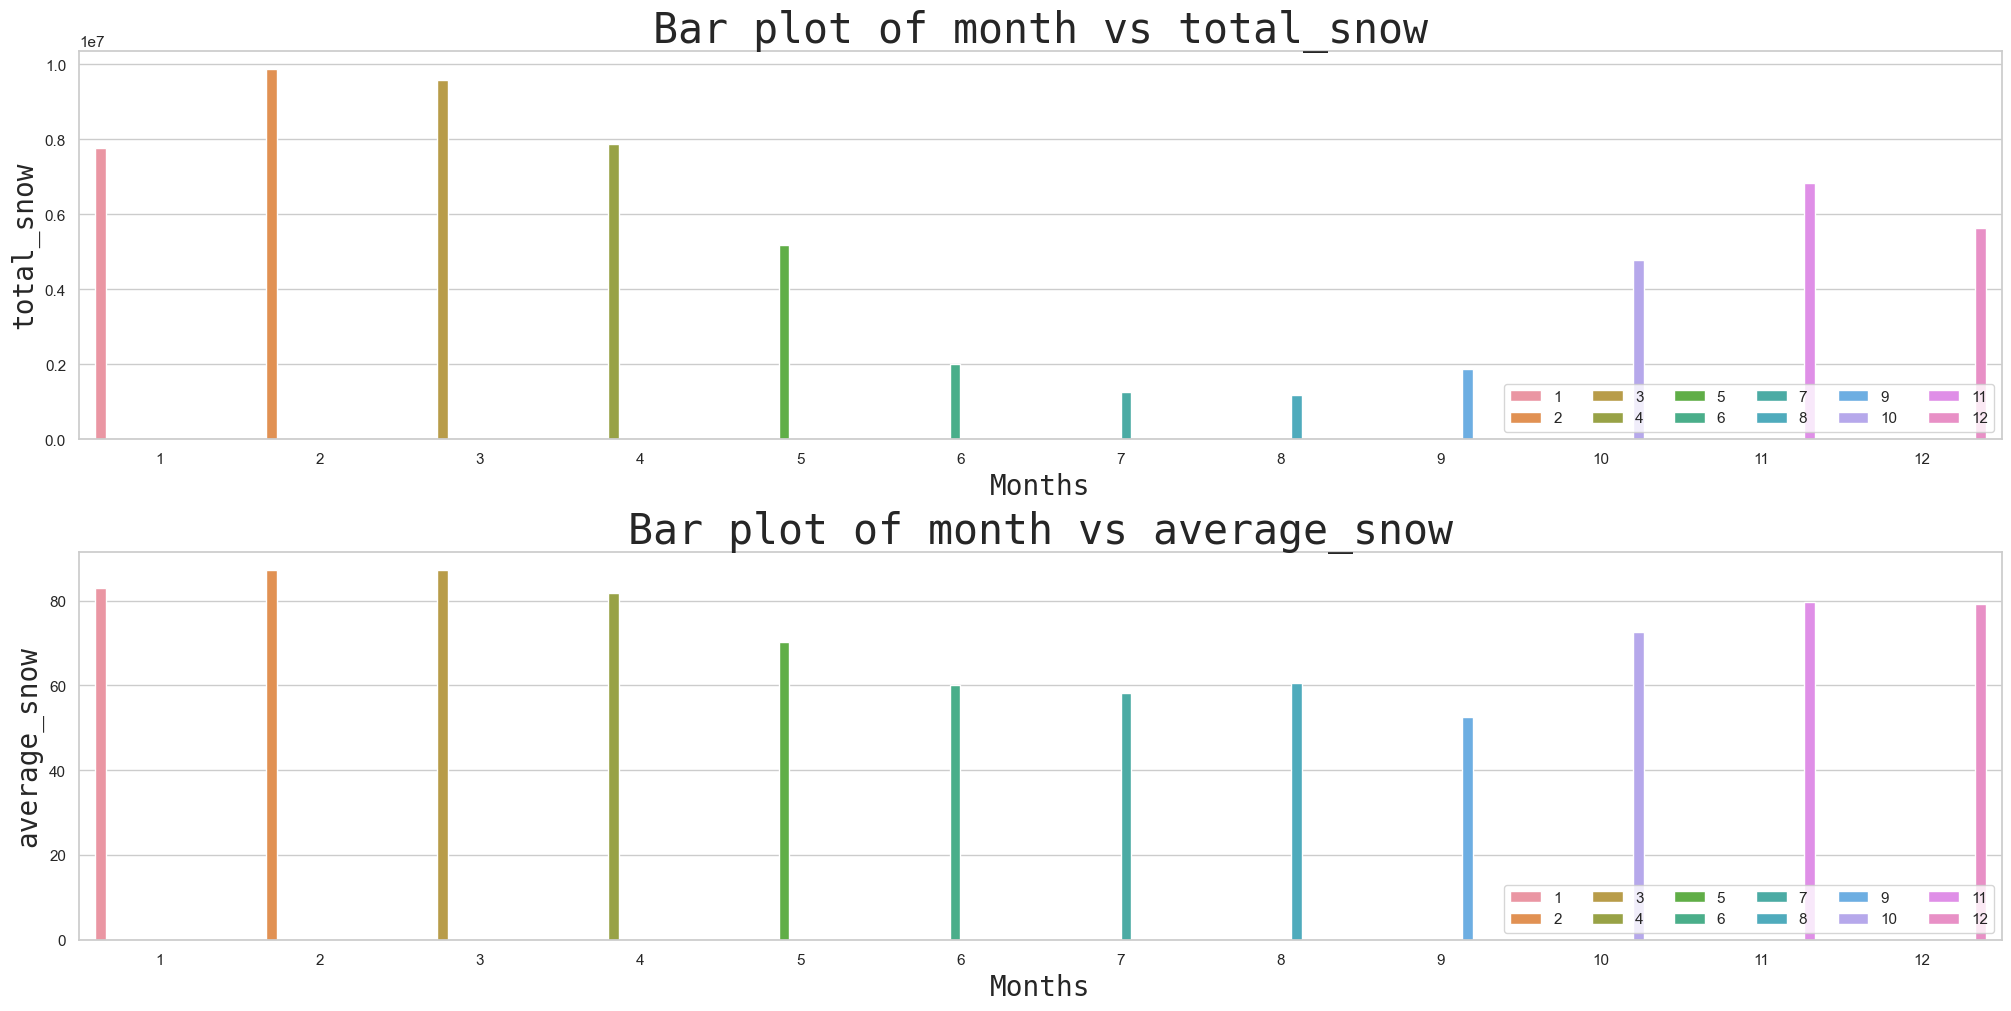

In [100]:
snow_bar.columns
['total_snow', 'average_snow']
sns.set_theme(style='whitegrid')
fonts1 = {"fontsize":30,"fontfamily":"monospace"}
fonts2 = {"fontsize":20,"fontfamily":"monospace"}

fig, ax = plt.subplots(2, figsize=(20,10), constrained_layout=True)

for index, column in enumerate(snow_bar.iloc[:,1:3]):
    sns.barplot(data=snow_bar, x="month", y=str(column), hue="month", ax=ax[index])
    
    ax[index].set_title(f"Bar plot of month vs {column}", fontdict=fonts1)
    ax[index].legend(loc="lower right", ncol=6)
    ax[index].set_xlabel("Months", fontdict=fonts2)
    ax[index].set_ylabel(f"{column}", fontdict=fonts2)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

Observations

Based on the observations on the bar chart by months, average snow for each month (top 5);

February
March
April
January
November

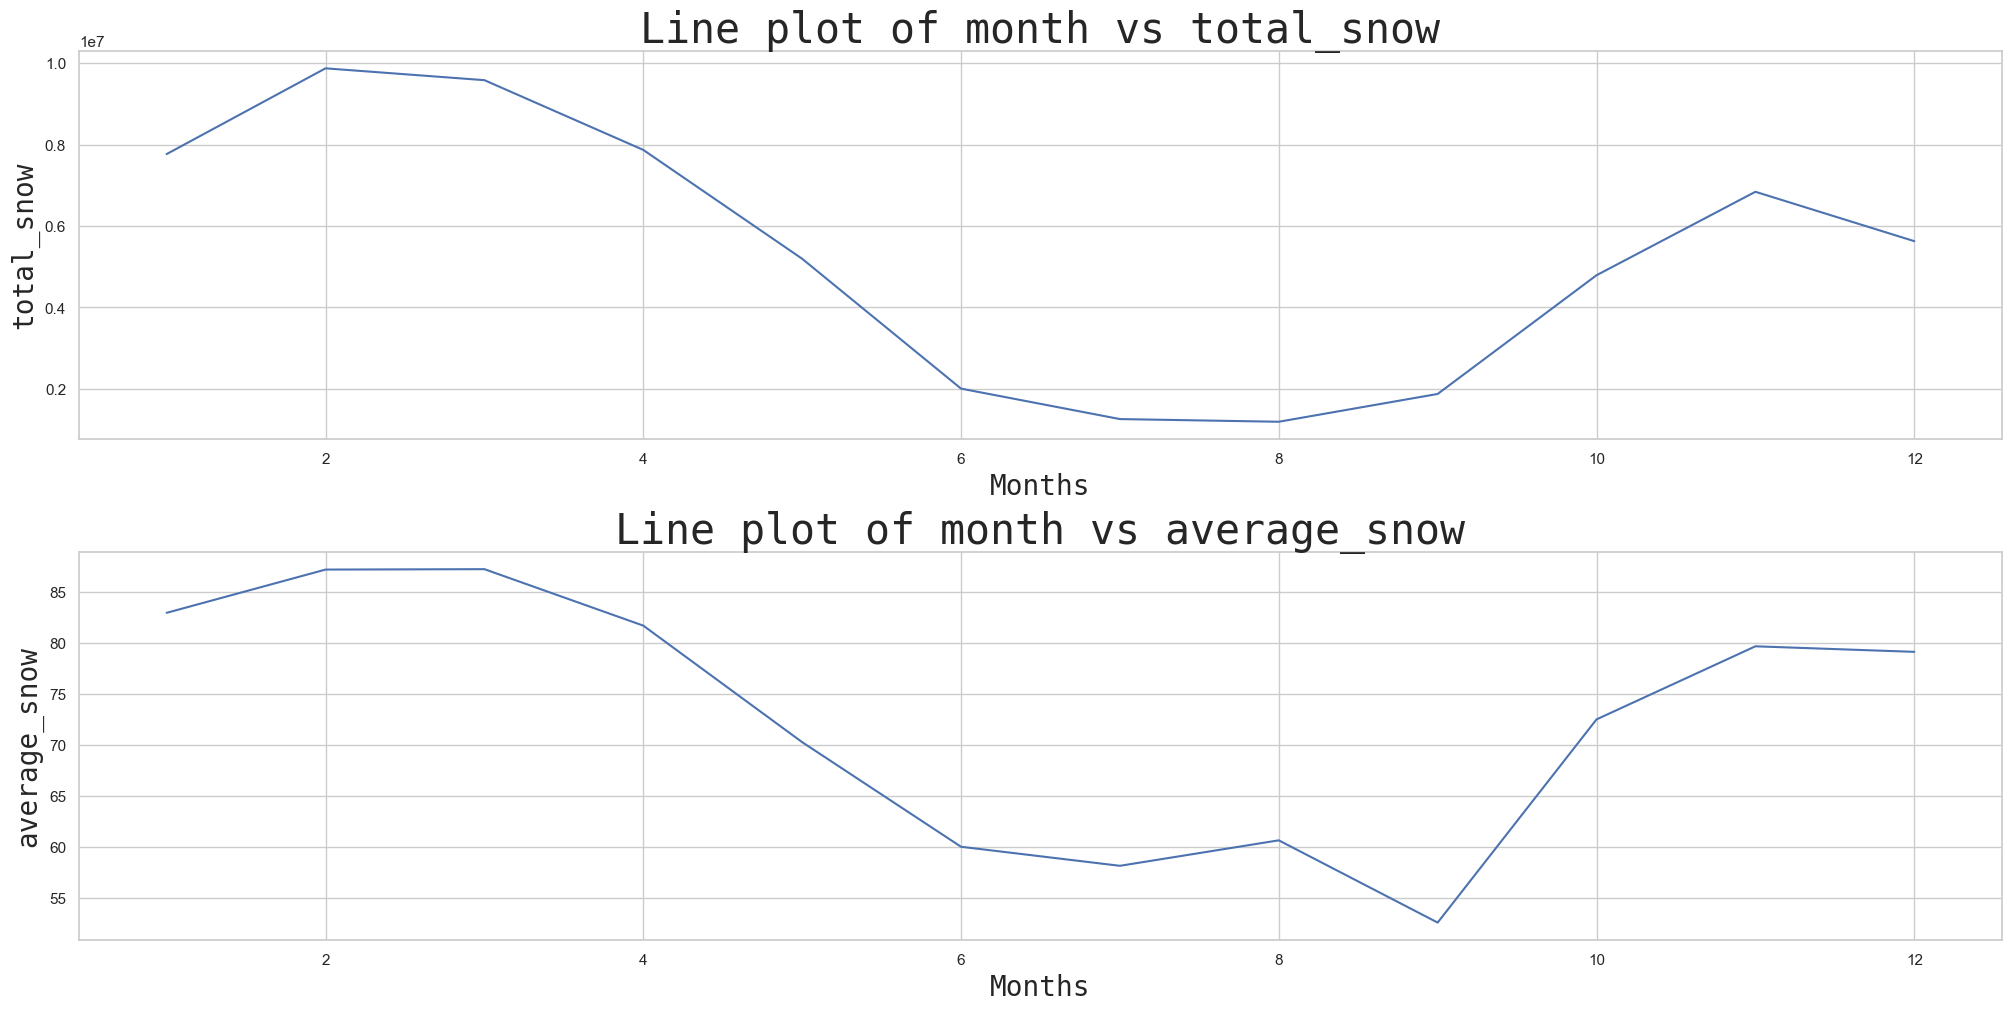

In [101]:
sns.set_theme(style='whitegrid')
fonts1 = {"fontsize":30,"fontfamily":"monospace"}
fonts2 = {"fontsize":20,"fontfamily":"monospace"}
fig,ax = plt.subplots(2,figsize=(20,10),constrained_layout=True)
for index,column in enumerate(snow_bar.iloc[:,1:3]):
    sns.lineplot(data=snow_bar,x="month",y=str(column),ax=ax[index])
    ax[index].set_title(f"Line plot of month vs {column}",fontdict=fonts1)
    # ax[index].legend(loc="upper right",ncol=6)
    ax[index].set_xlabel("Months",fontdict=fonts2)
    ax[index].set_ylabel(f"{column}",fontdict=fonts2)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

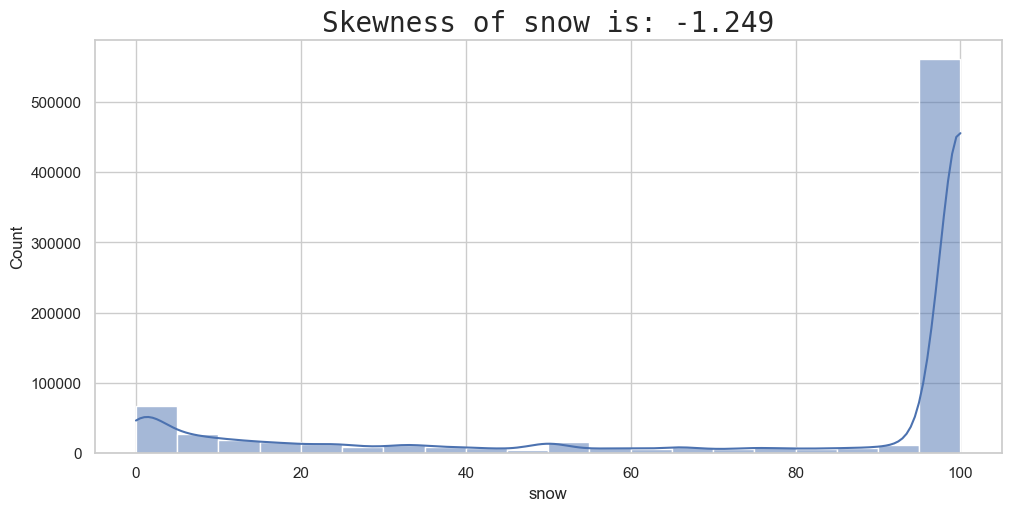

In [102]:
fig,ax = plt.subplots(figsize=(10,5),constrained_layout=True)

sns.histplot(data=analysis_snow,kde=True,x="snow",bins=20)
ax.set_title(f'Skewness of snow is: {np.around(analysis_snow["snow"].skew(axis=0),3)}',fontdict=fonts2)
# fig.suptitle("Histogram plot",fontsize=30,fontdict=fonts1)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

Resorts analysis

In [103]:
analysis_resorts.columns

Index(['resort', 'latitude', 'longitude', 'country', 'continent', 'price',
       'season', 'highest_point', 'lowest_point', 'beginner_slopes',
       'intermediate_slopes', 'difficult_slopes', 'total_slopes',
       'longest_run', 'snow_cannons', 'surface_lifts', 'chair_lifts',
       'gondola_lifts', 'total_lifts', 'lift_capacity', 'child_friendly',
       'snowparks', 'nightskiing', 'summer_skiing'],
      dtype='object')

<Axes: >

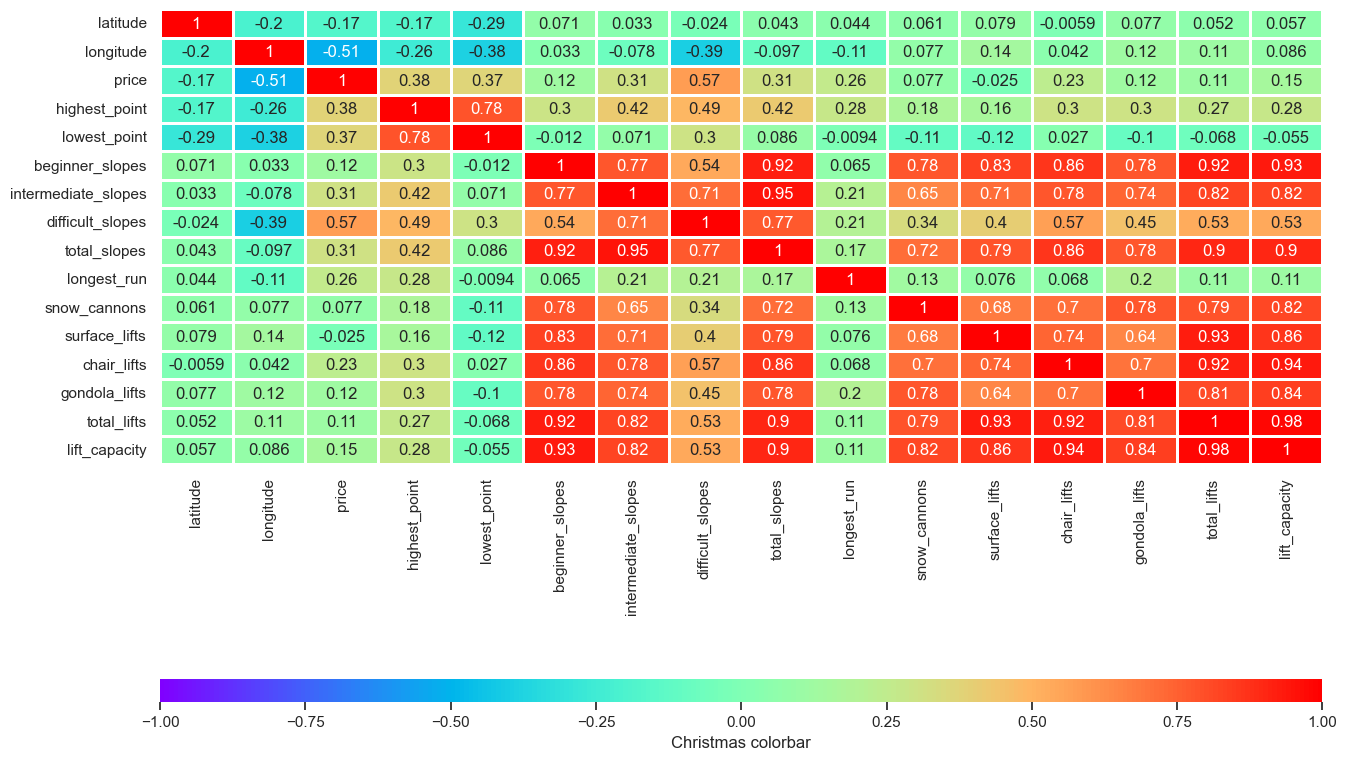

In [104]:
sns.set_theme()
grid_kws = {"height_ratios": (1,.05),"hspace":.9}
fig,(ax, cbar_ax) =plt.subplots(2,figsize=(15, 9),gridspec_kw=grid_kws)


sns.heatmap(analysis_resorts.corr(),
            ax=ax,
            cbar_ax=cbar_ax,
            cmap="rainbow",
            annot=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
            linewidths=1
            )

<Axes: >

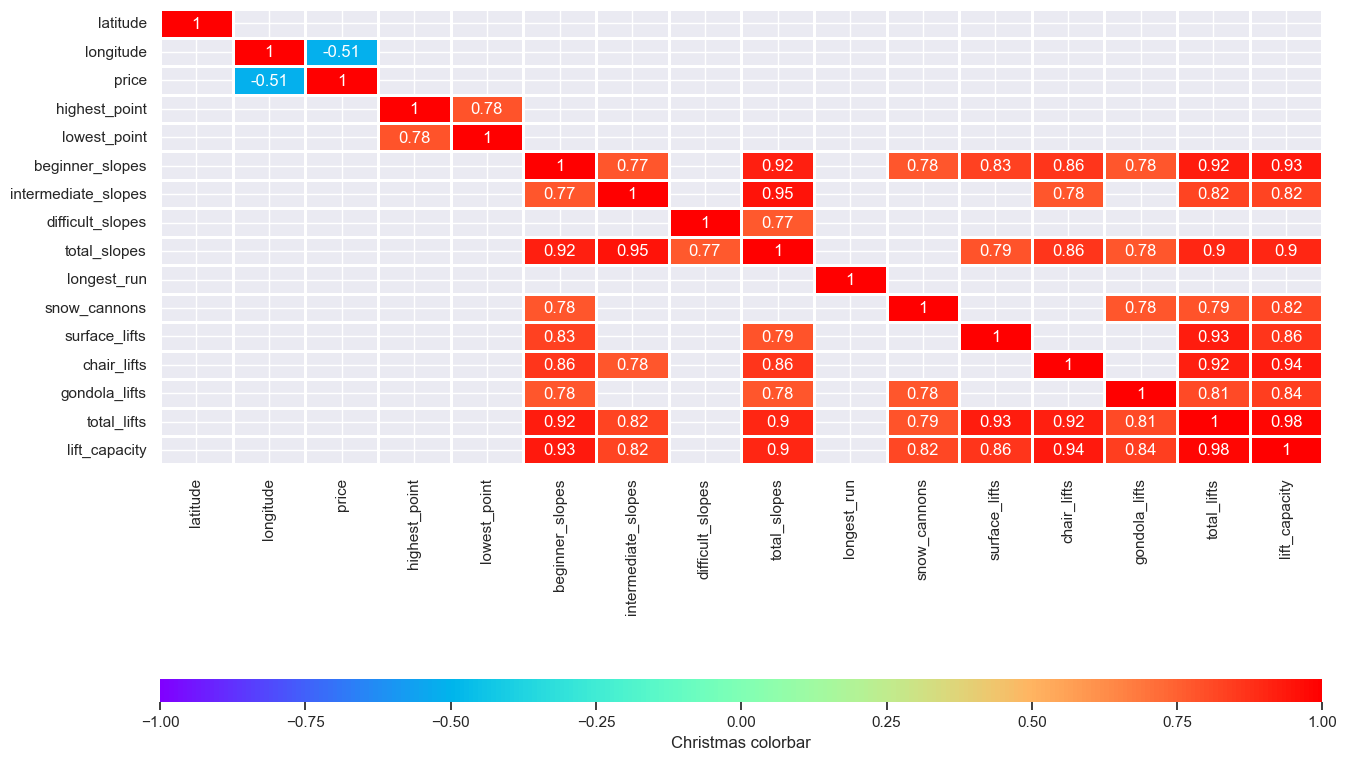

In [105]:
pearson_corr = analysis_resorts.corr()

upper_bound = pearson_corr >= 0.75
lower_bound = pearson_corr <= -0.45
cond_final = (upper_bound | lower_bound)
filtered_correlation = pearson_corr[cond_final]
sns.set_theme()
grid_kws = {"height_ratios": (1,.05),"hspace":.9}
fig,(ax, cbar_ax) =plt.subplots(2,figsize=(15, 9),gridspec_kw=grid_kws)


sns.heatmap(filtered_correlation,
            ax=ax,
            cbar_ax=cbar_ax,
            cmap="rainbow",
            annot=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
            linewidths=1
            )

### Observation

From the heatmap the follow can be noticed;

A negative correlation between price and longitude
Strong positive correlaton between the following;
highest_point
lowest_point
beginner_slopes
intermediate_slopes
difficult_slopes
total_slopes
longest_run
snow_cannons
surface_lifts
chair_lifts
gondola_lifts
total_lifts
lift_capacity

The following line and scatter plots gives an example of the correlation earlier mentioned and shown on the heatma

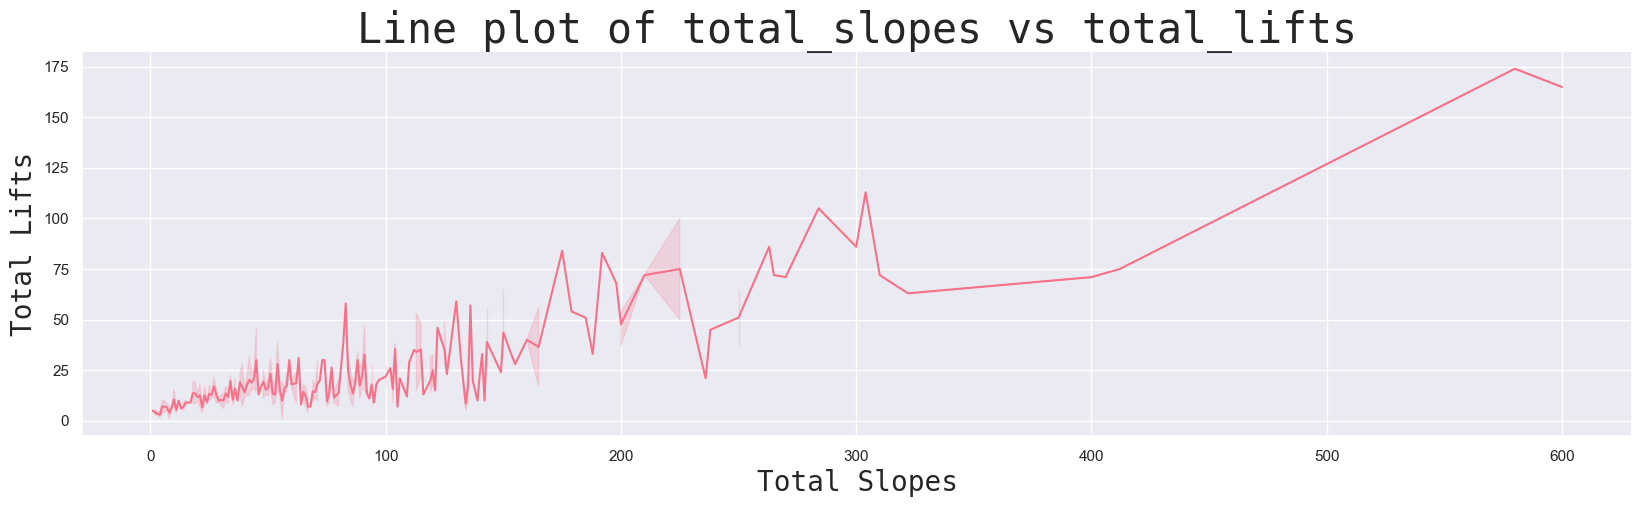

In [106]:
def line_plots(x:str,y:str):
    try:
        sns.set_theme(style='darkgrid',palette='husl')
        fig,ax = plt.subplots(figsize=(20,5))
        sns.lineplot(data=analysis_resorts,x=x,y=y)
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=fonts1)
        ax.set_xlabel(f"Total Slopes", fontdict=fonts2)
        ax.set_ylabel(f"Total Lifts", fontdict=fonts2)
        # ax.tick_params(axis='x', rotation=90)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        analysis_resorts.info(memory_usage='deep')
        
line_plots("total_slopes","total_lifts")

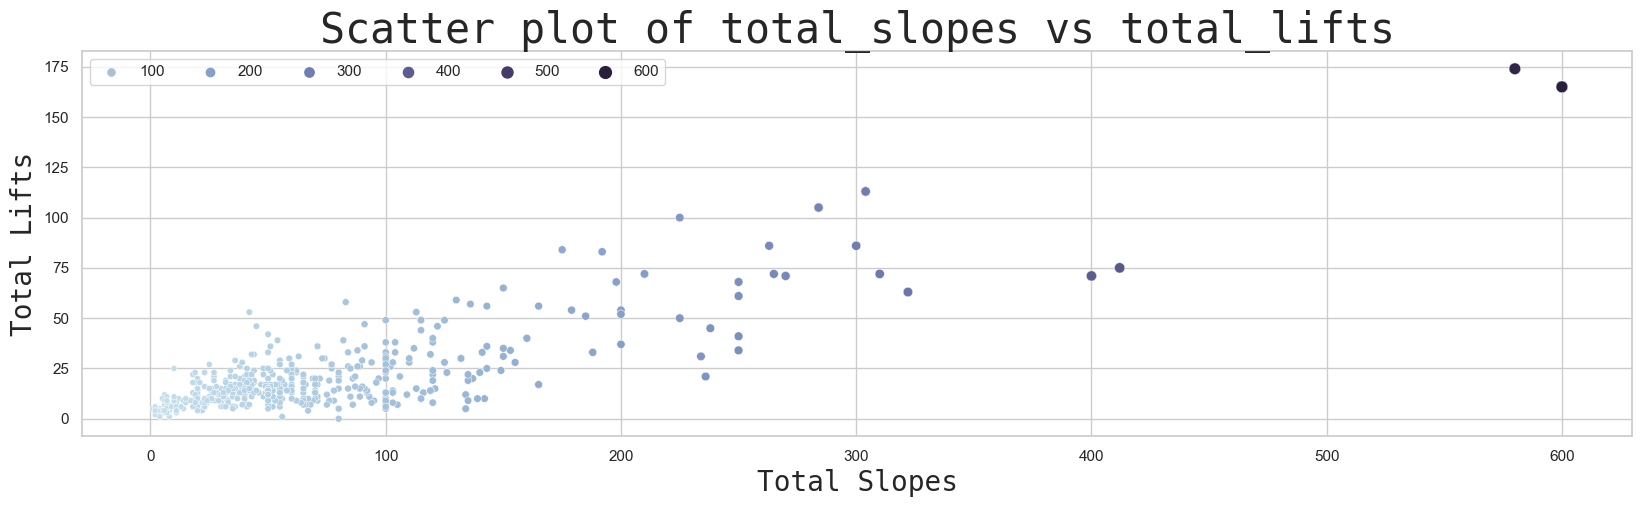

In [107]:
def scatter_plots(x:str,y:str):
    try:
        my_palette =sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
        sns.set_theme(style='whitegrid')
        fig,ax = plt.subplots(figsize=(20,5))
        sns.scatterplot(data=analysis_resorts,x=x,y=y,hue=x, size=x,palette=my_palette)
        ax.set_title(f'Scatter plot of {x} vs {y}',fontdict=fonts1)
        ax.set_xlabel(f"Total Slopes", fontdict=fonts2)
        ax.set_ylabel(f"Total Lifts", fontdict=fonts2)
        # ax.tick_params(axis='x', rotation=90)
        ax.legend(ncol=6, loc="upper left")
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        analysis_resorts.info(memory_usage='deep')
scatter_plots("total_slopes","total_lifts")

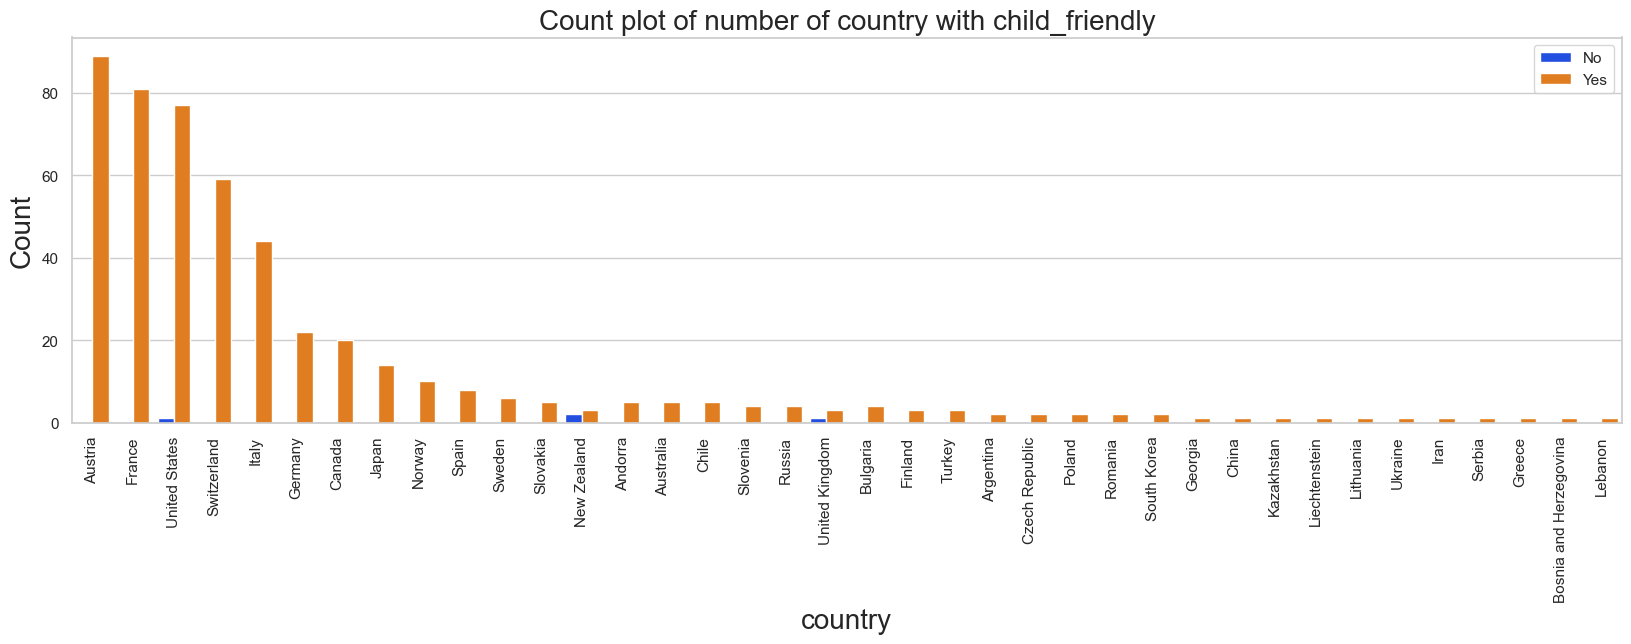

In [108]:
def plotting_count(x:str,hue:str):    
    try:
        fig, ax = plt.subplots(figsize=(20,5))
        sns.set_theme(style='white')

        ordering = analysis_resorts[x].value_counts()
        my_palette = sns.color_palette('bright')
        sns.countplot(data=analysis_resorts, x=x, hue=hue,palette=my_palette,
        order=ordering.sort_values().index[::-1], # descending order
        )
        ax.tick_params(axis='x', rotation=90)
        ax.set_title(f'Count plot of number of {x} with {hue}',fontsize=20)

        ax.set_xlabel(f"{x}", fontdict={'fontsize':20})
        ax.set_ylabel("Count", fontdict={'fontsize':20})
        ax.legend(loc="upper right")
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            analysis_resorts.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            analysis_resorts.info(memory_usage='deep')
plotting_count('country','child_friendly')

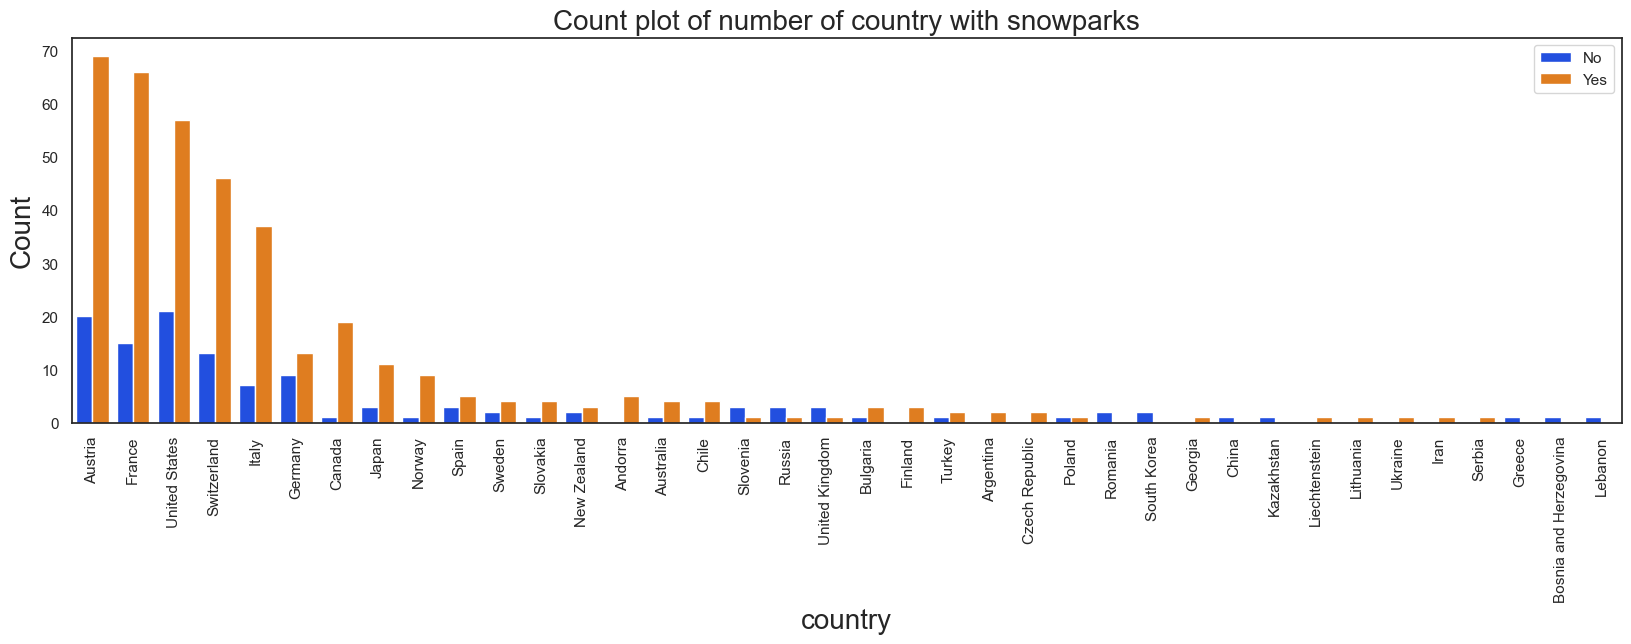

In [109]:
plotting_count('country','snowparks')

Observations

The following countries have snow parks (top 5):

Austria
France
USA
Switzerland
Italy
Not all parts of the countries does have a snow park

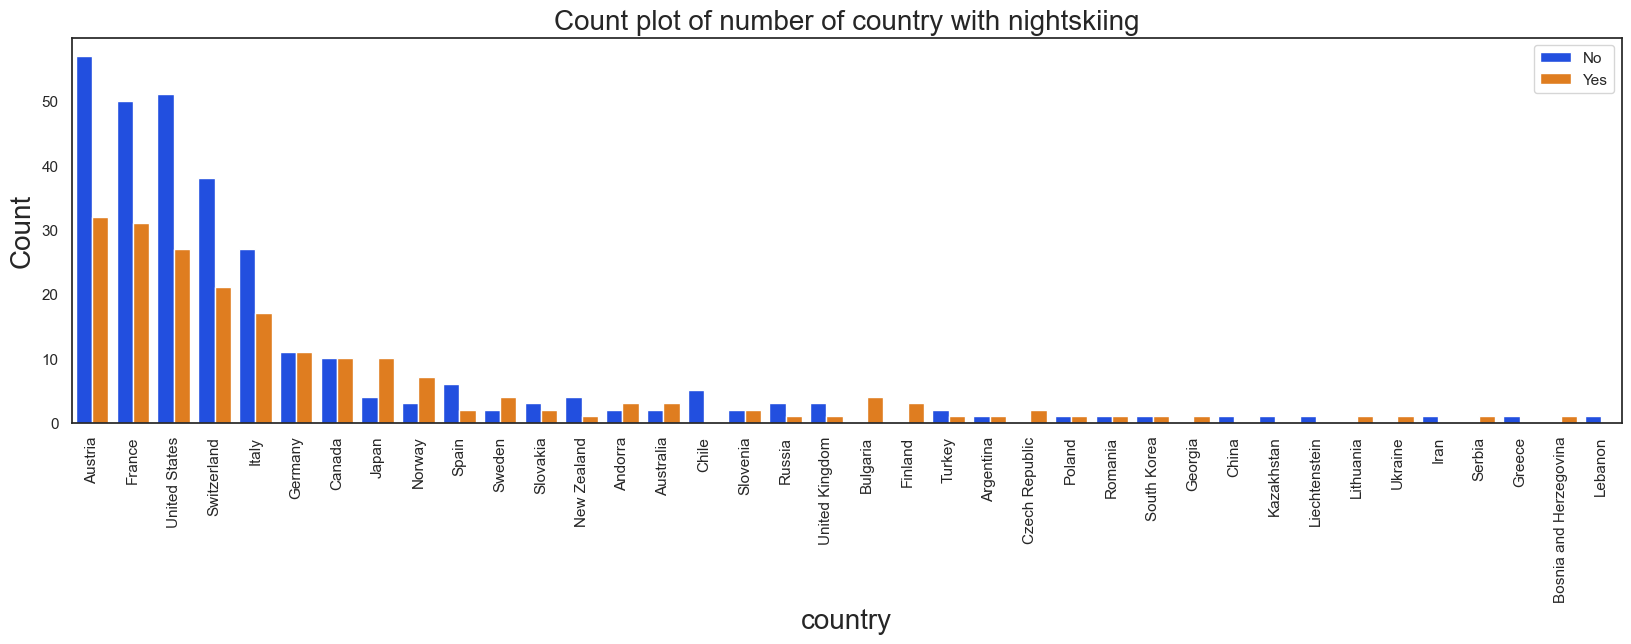

In [110]:
plotting_count('country','nightskiing')

Observations

The following countries don't have night skiing (top 5):

Austria
France
USA
Switzerland
Italy
Some parts of the countries does have night skiing

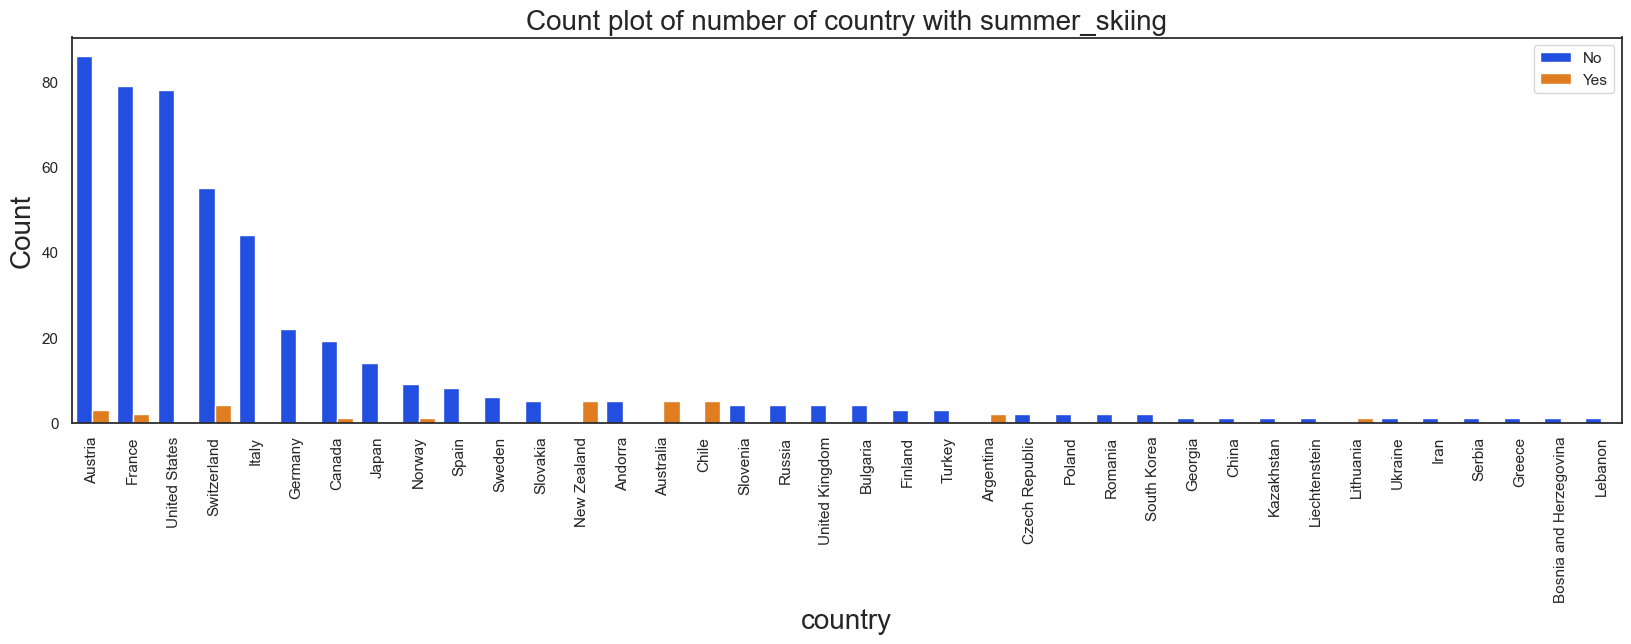

In [111]:
plotting_count('country','summer_skiing')

Observations

Most countries do not have summer skiing.

In [112]:
def plotting_bar(x:str,group:str):
    try:
        grouped_agg = analysis_resorts.groupby(group)[x].agg([(f"Calculated Mean {x}", 'mean'),(f"Calculated Deviation {x}", 'std')]).reset_index()
        fig,ax = plt.subplots(1,2,figsize=(20,10))
        
        order_mean = grouped_agg.sort_values(f"Calculated Mean {x}",ascending=False)[group]
        order_std = grouped_agg.sort_values(f"Calculated Deviation {x}",ascending=False)[group]
        my_palette = sns.color_palette("husl",2)
        # my_palette = sns.crayon_palette(["Orange-Red","Green"])
        sns.set_theme(style="whitegrid")
        sns.barplot(order = order_mean,data=grouped_agg, x=group, y=f'Calculated Mean {x}', ax=ax[0], palette=my_palette)
        sns.barplot(order =order_std,data=grouped_agg, x=group, y=f'Calculated Deviation {x}', ax=ax[1], palette=my_palette)

        ax[0].set_title(f'Calculated Mean {x}',fontsize=20)
        ax[0].set_xlabel(f"{group}", fontdict={'fontsize':20})
        ax[0].set_ylabel(f"Calculated Mean {x}", fontdict={'fontsize':20})
        ax[0].tick_params(axis='x', rotation=90)
        

        ax[1].set_title(f'Calculated Deviation {x}',fontsize=20)
        ax[1].set_xlabel(f"{group}", fontdict={'fontsize':20})
        ax[1].set_ylabel(f"Calculated Deviation {x}", fontdict={'fontsize':20})
        ax[1].tick_params(axis='x', rotation=90)
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            analysis_resorts.info(memory_usage='deep')

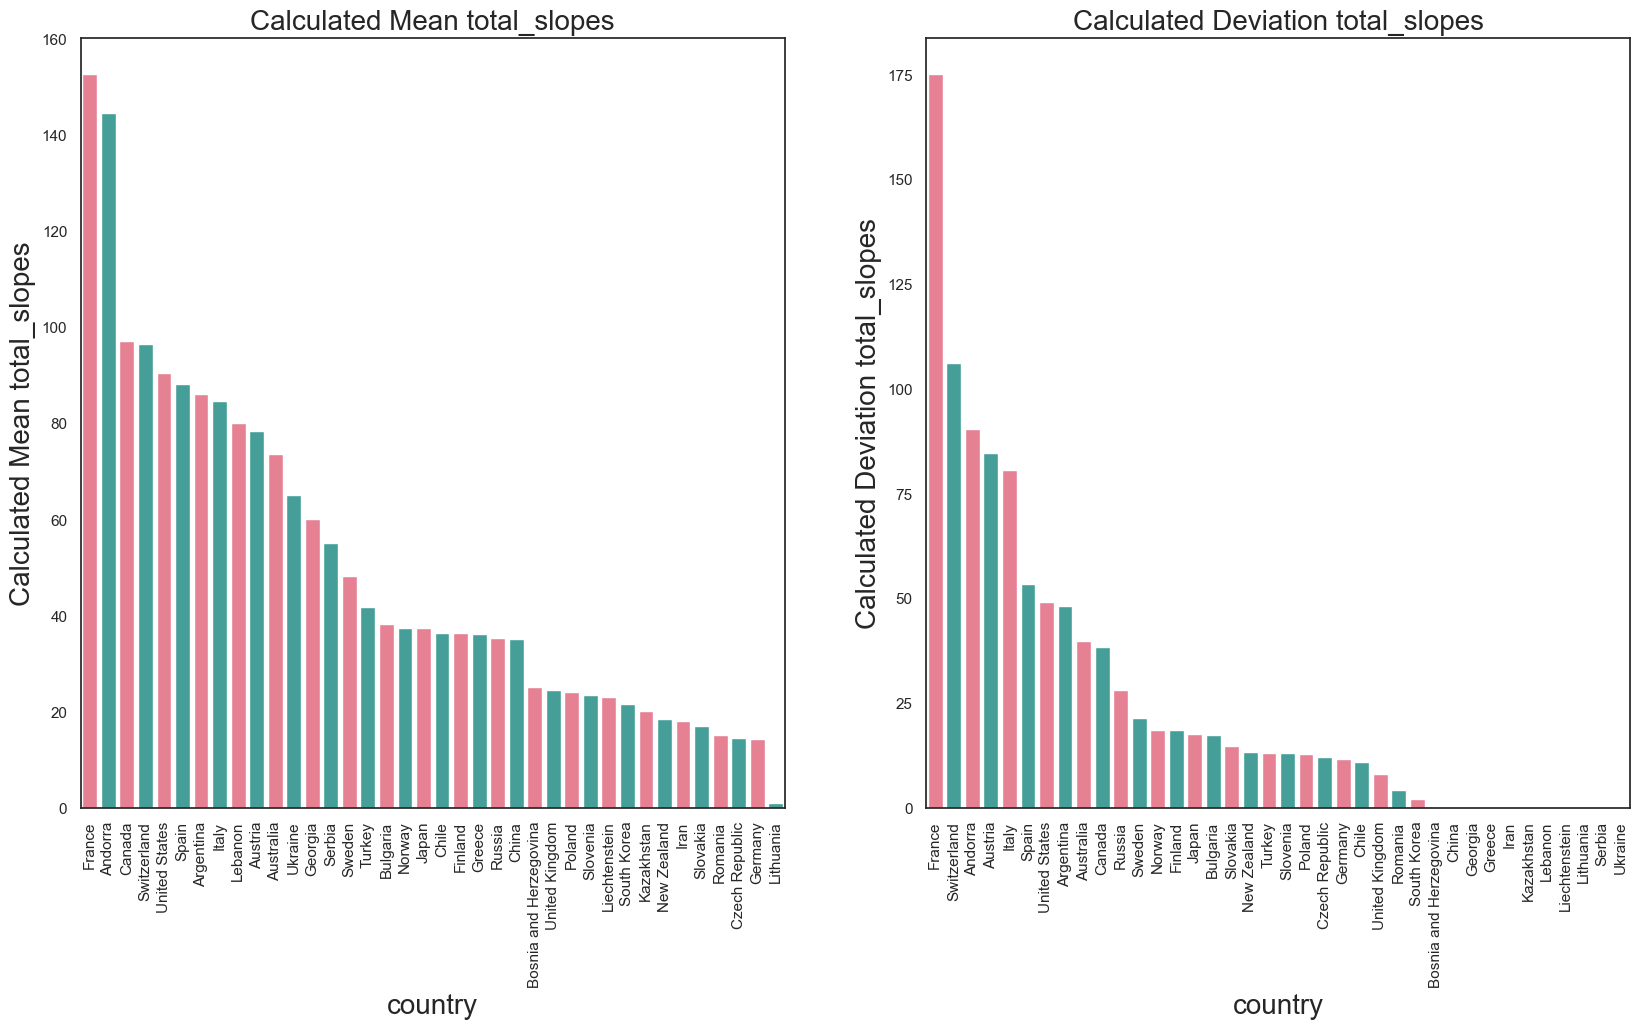

In [113]:
plotting_bar('total_slopes',group='country') 

Observations

Countries mean slopes at differnt resorts (from total_slopes) (top 5);

France
Andorra
Canada
USA
Switzerland
France has the highest deviation from mean, meaning the total slopes at each resort quite spread away from the mean.

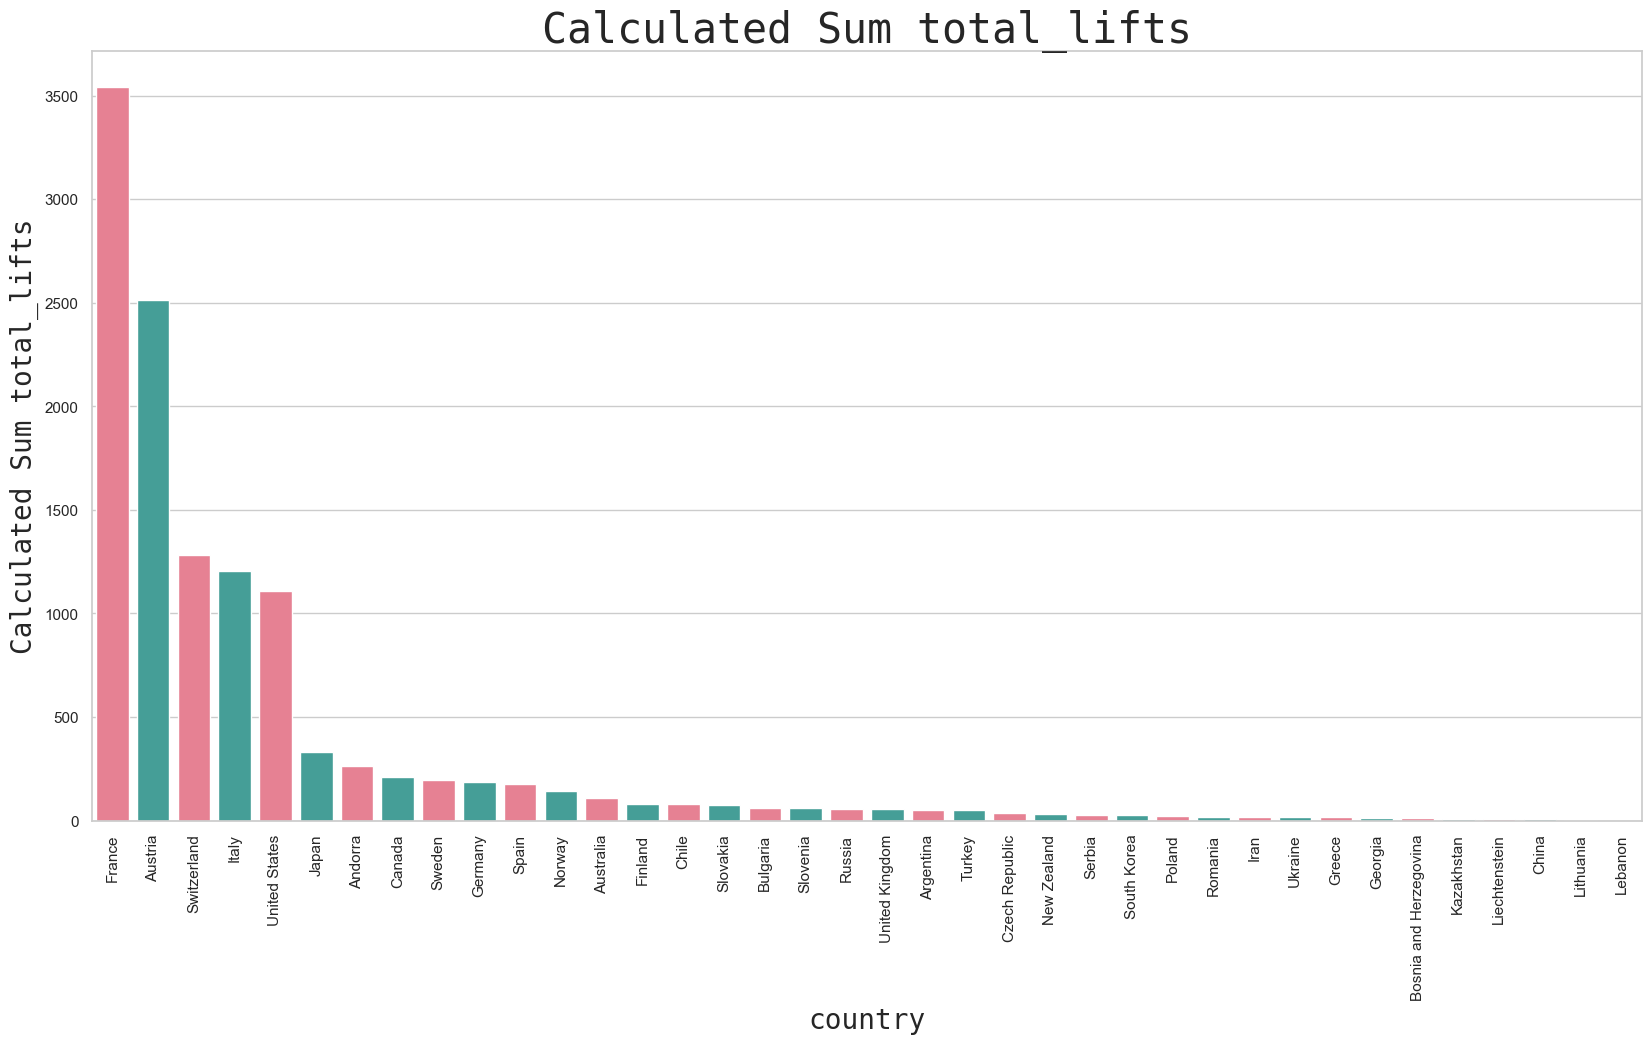

In [114]:
grouped_agg = (analysis_resorts.groupby("country")["total_lifts"]
                                .agg([(f"Calculated Sum total_lifts", 'sum')])
                                .reset_index())

fig,ax = plt.subplots(figsize=(20,10))
my_palette = sns.color_palette("husl",2)

order_mean = (grouped_agg.
        sort_values("Calculated Sum total_lifts",ascending=False)["country"])

sns.set_theme(style="whitegrid")
sns.barplot(order = order_mean,data=grouped_agg, x="country", y=f'Calculated Sum total_lifts'
                                , palette=my_palette)

ax.set_title(f'Calculated Sum total_lifts',fontdict=fonts1)
ax.set_xlabel(f"country", fontdict=fonts2)
ax.set_ylabel(f"Calculated Sum total_lifts", fontdict=fonts2)
ax.tick_params(axis='x', rotation=90)

Observations

Total lifts by countries (top 5);

France
Austria
Switzerland
Italy
USA

In [115]:
nums = analysis_resorts.select_dtypes(include=np.number)
nums

,latitude,longitude,price,highest_point,lowest_point,beginner_slopes,intermediate_slopes,difficult_slopes,total_slopes,longest_run,snow_cannons,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity
0,60,8,46,1450,620,29,10,4,43,6,325,15,6,0,21,22921
1,60,8,44,1178,800,18,12,4,34,2,100,18,6,0,24,14225
2,47,9,48,2110,650,13,12,1,26,9,123,4,4,3,11,16240
3,49,-117,60,2075,1185,20,50,50,120,7,0,2,5,1,8,9200
4,61,10,45,1030,195,33,7,4,44,6,150,14,3,1,18,21060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,42,2,0,2700,1830,9,15,7,31,0,0,11,2,0,13,11865
495,47,11,29,1350,980,6,7,2,15,2,8,9,1,0,10,5850
496,47,10,43,1530,1000,15,5,3,23,3,33,6,4,0,10,5425
497,47,15,42,1774,777,18,6,0,24,0,240,7,2,0,9,14400


Text(0.5, 0.98, 'Histogram plot of numeric data')

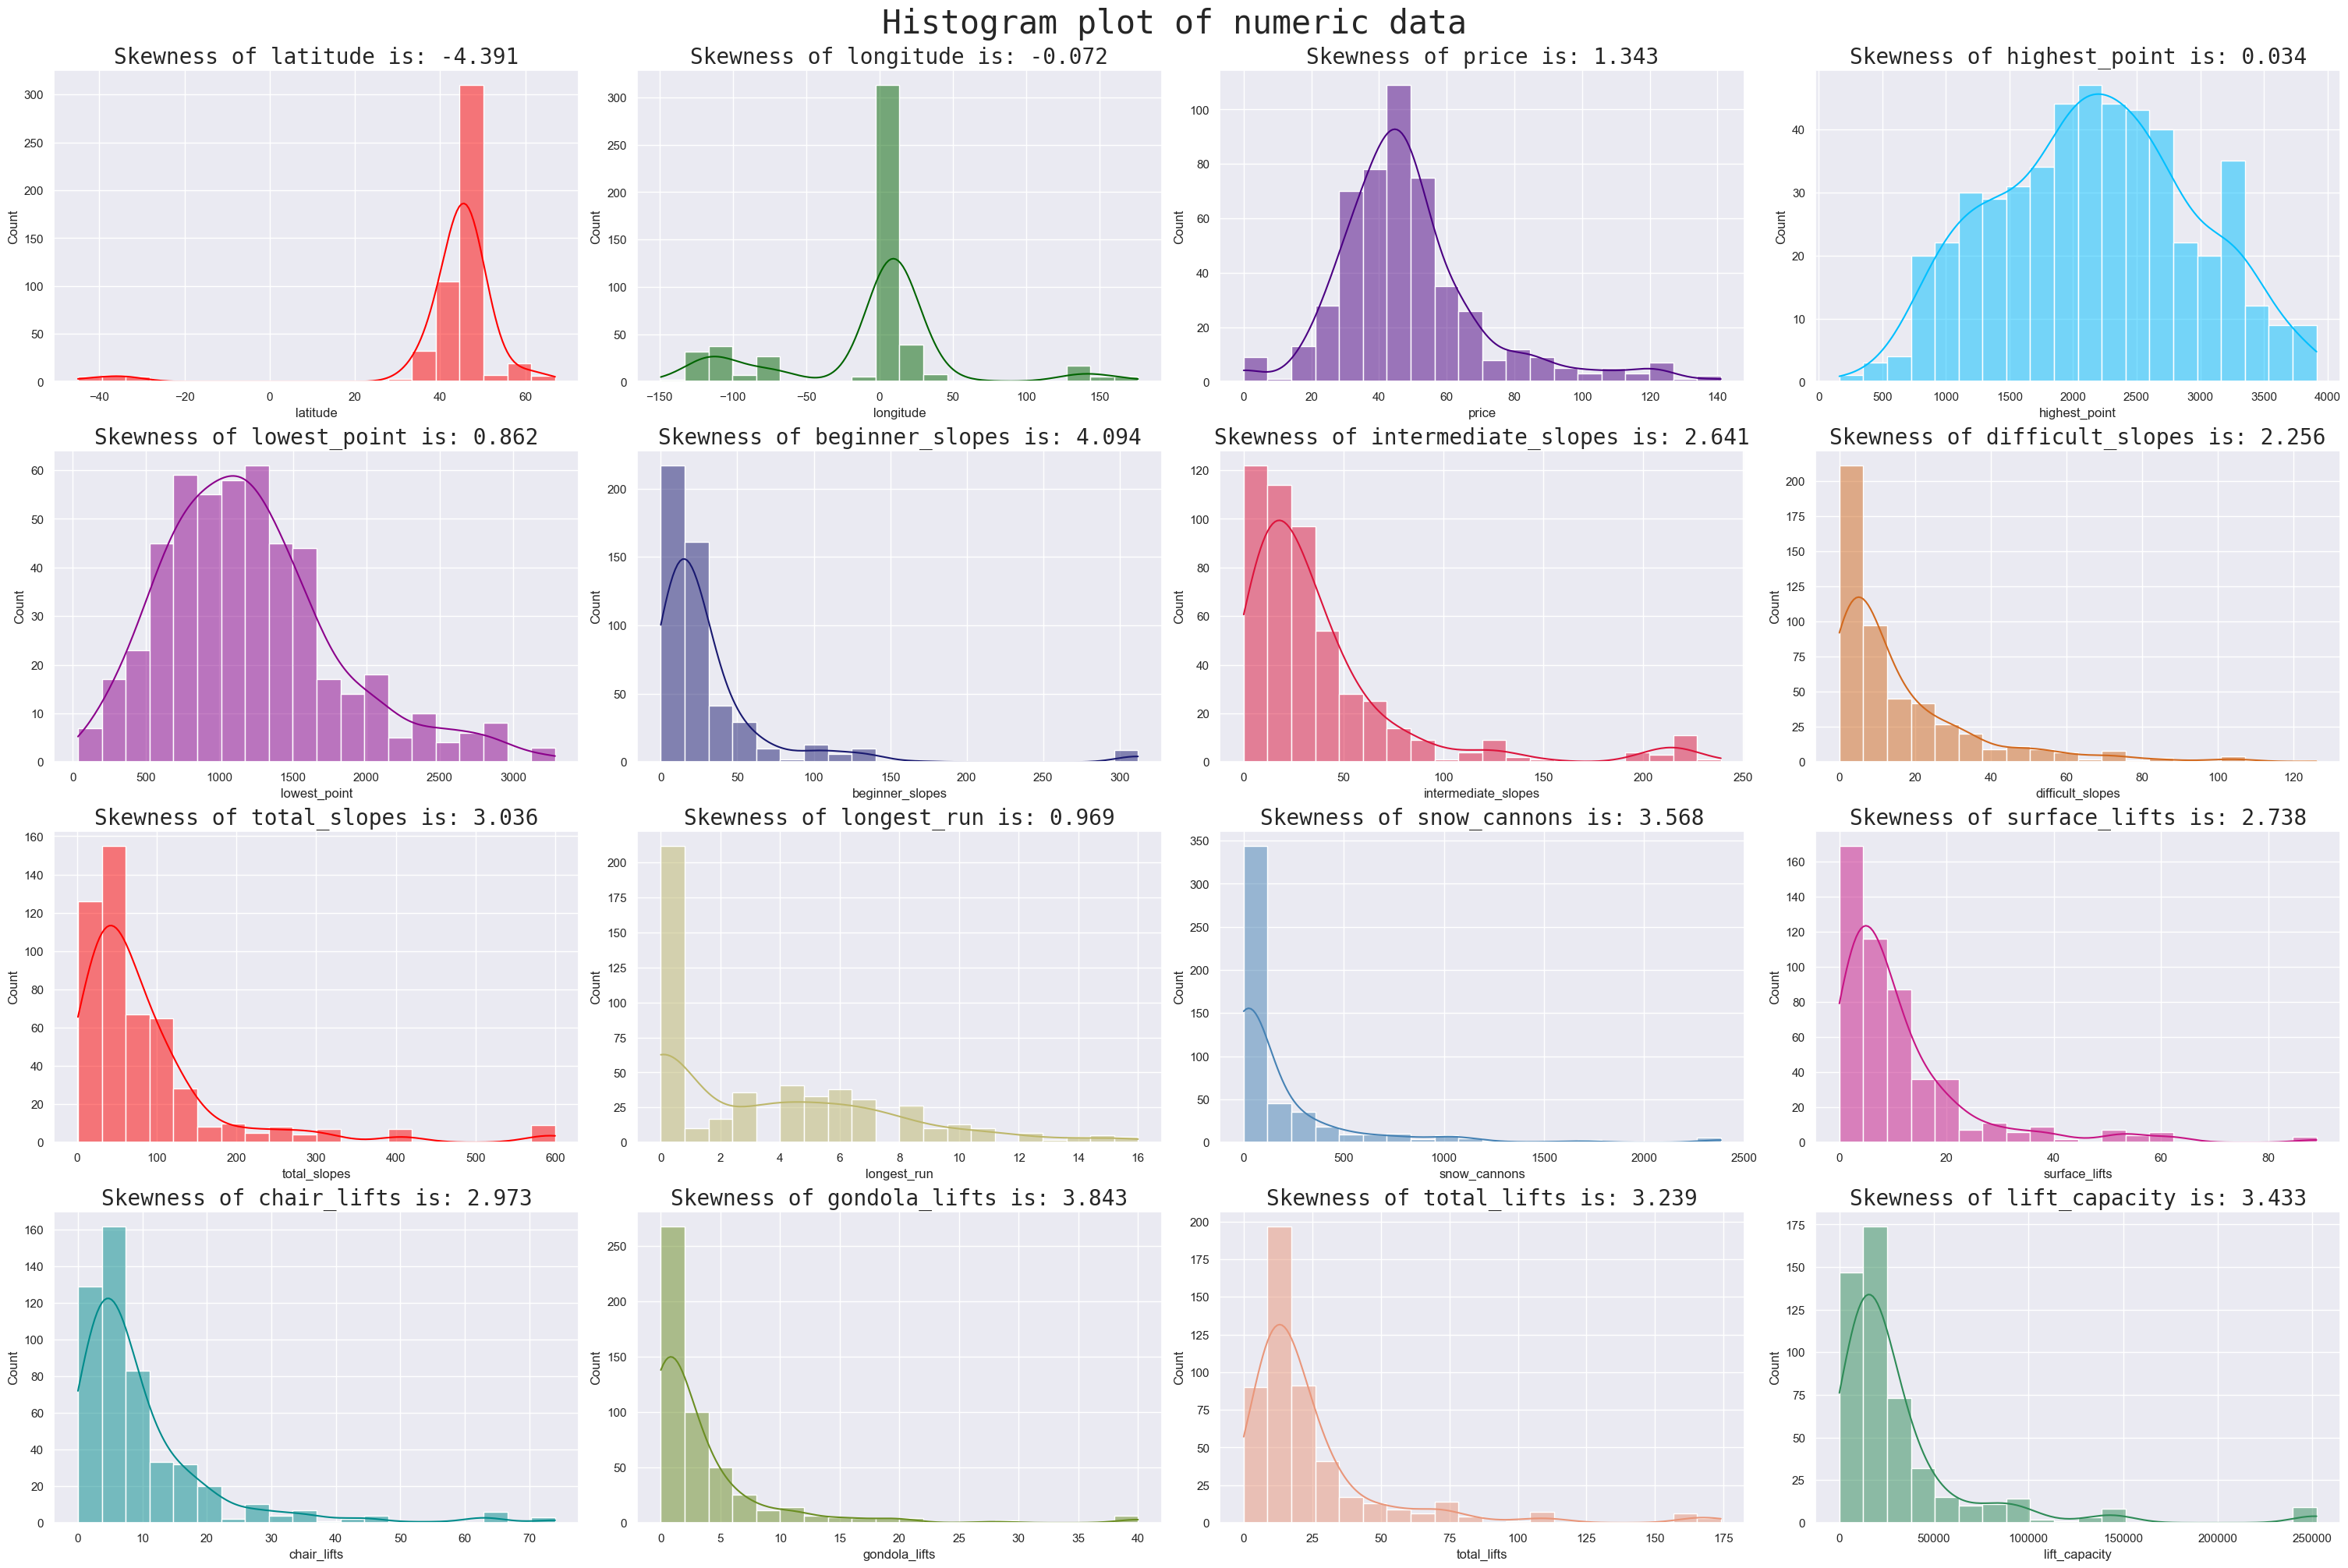

In [118]:
fig, ax = plt.subplots(4, 4, figsize=(30, 20), constrained_layout=True)
ax = ax.ravel()
colors_list = ['red', 'darkgreen', 'indigo', 'deepskyblue', 'darkmagenta', 'midnightblue', 'crimson', 'chocolate', 'red',                "darkkhaki", "steelblue", 'mediumvioletred', "darkcyan", "olivedrab", 'darksalmon', 'seagreen']

sns.set_theme(style='darkgrid')

for index, value in enumerate(nums):
    sns.histplot(data=nums, x=value, color=colors_list[index], ax=ax[index], bins=20, kde=True)
    ax[index].set_title(f'Skewness of {value} is: {np.around(nums[value].skew(axis=0), 3)}', fontdict=fonts2)
    
fig.suptitle("Histogram plot of numeric data", fontdict=fonts1, fontsize=30)


TypeError: Got both 'fontsize' and 'size', which are aliases of one another

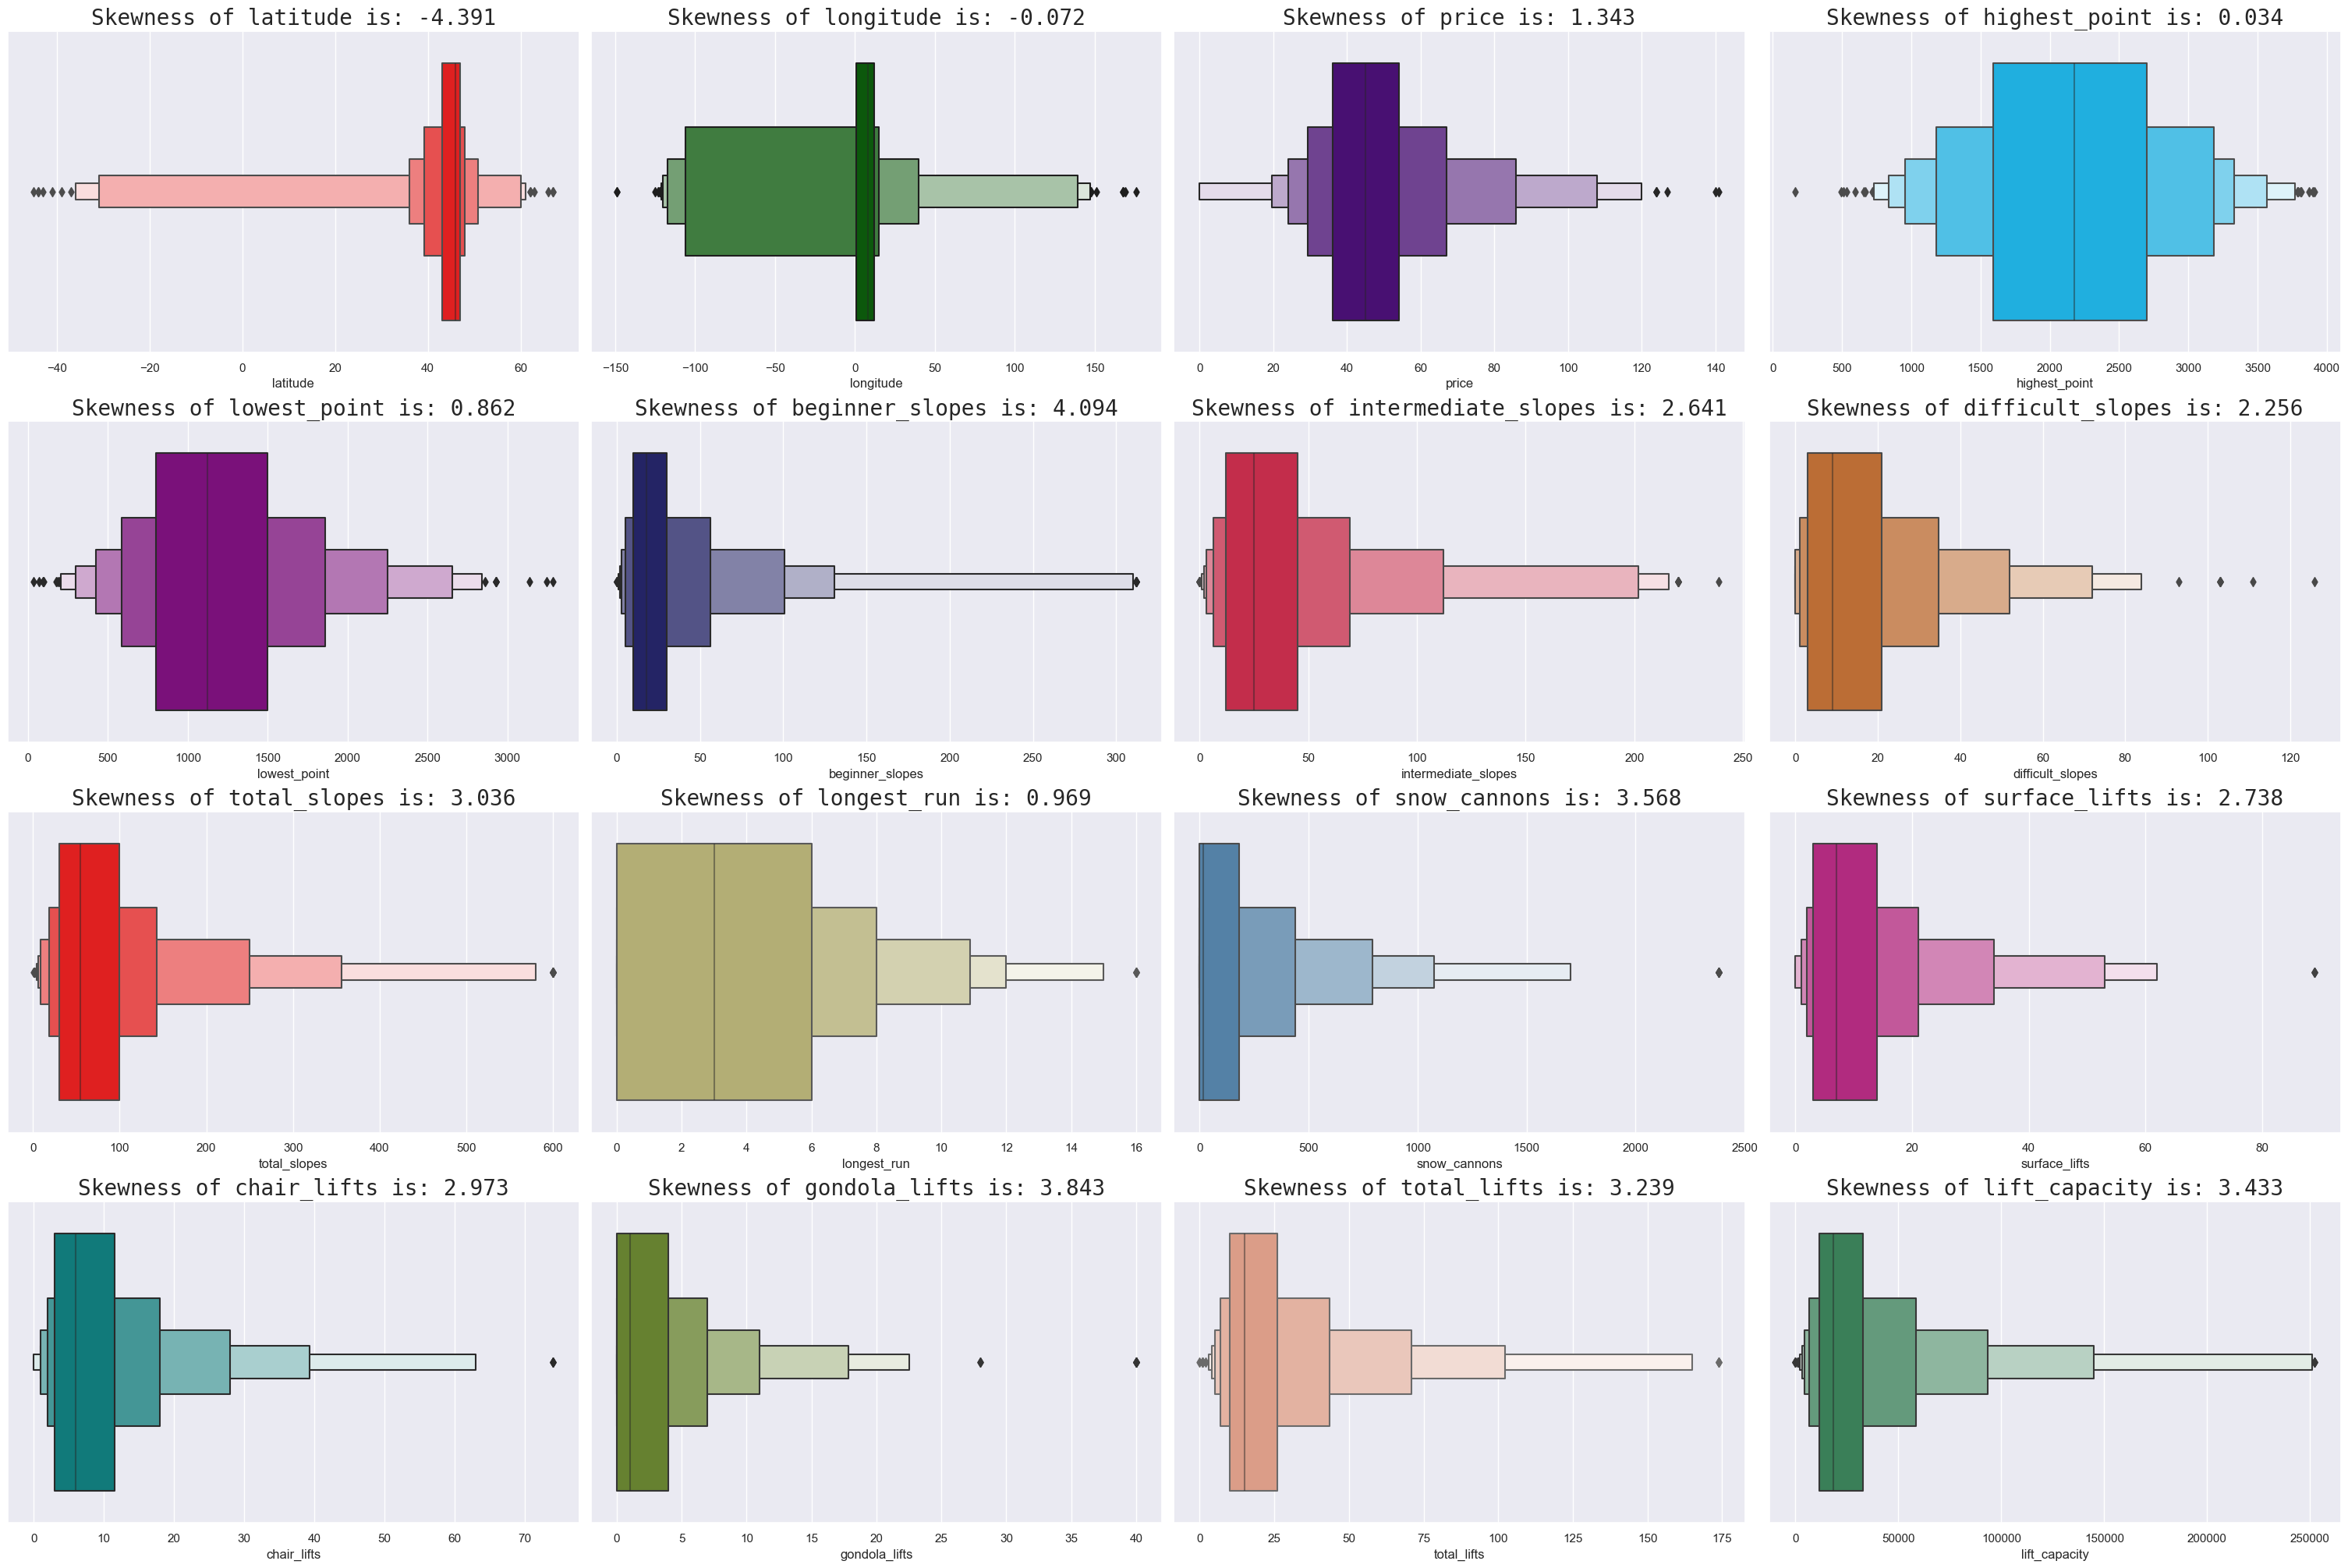

In [120]:
fig, ax = plt.subplots(4, 4, figsize=(30, 20), constrained_layout=True)
ax = ax.ravel()
colors_list = ['red', 'darkgreen', 'indigo', 'deepskyblue', 'darkmagenta', 'midnightblue', 'crimson', 'chocolate', 'red', "darkkhaki", "steelblue", 'mediumvioletred', "darkcyan", "olivedrab", 'darksalmon', 'seagreen']

sns.set_theme(style='darkgrid')

for index, value in enumerate(nums):
    sns.boxenplot(data=nums, x=value, color=colors_list[index], ax=ax[index])
    ax[index].set_title(f'Skewness of {value} is: {np.around(nums[value].skew(axis=0),3)}', fontdict=fonts2)

fig.suptitle("Boxen plot of numeric data", fontdict=fonts1)


Text(0.5, 0.98, 'Violin plot of numeric data')

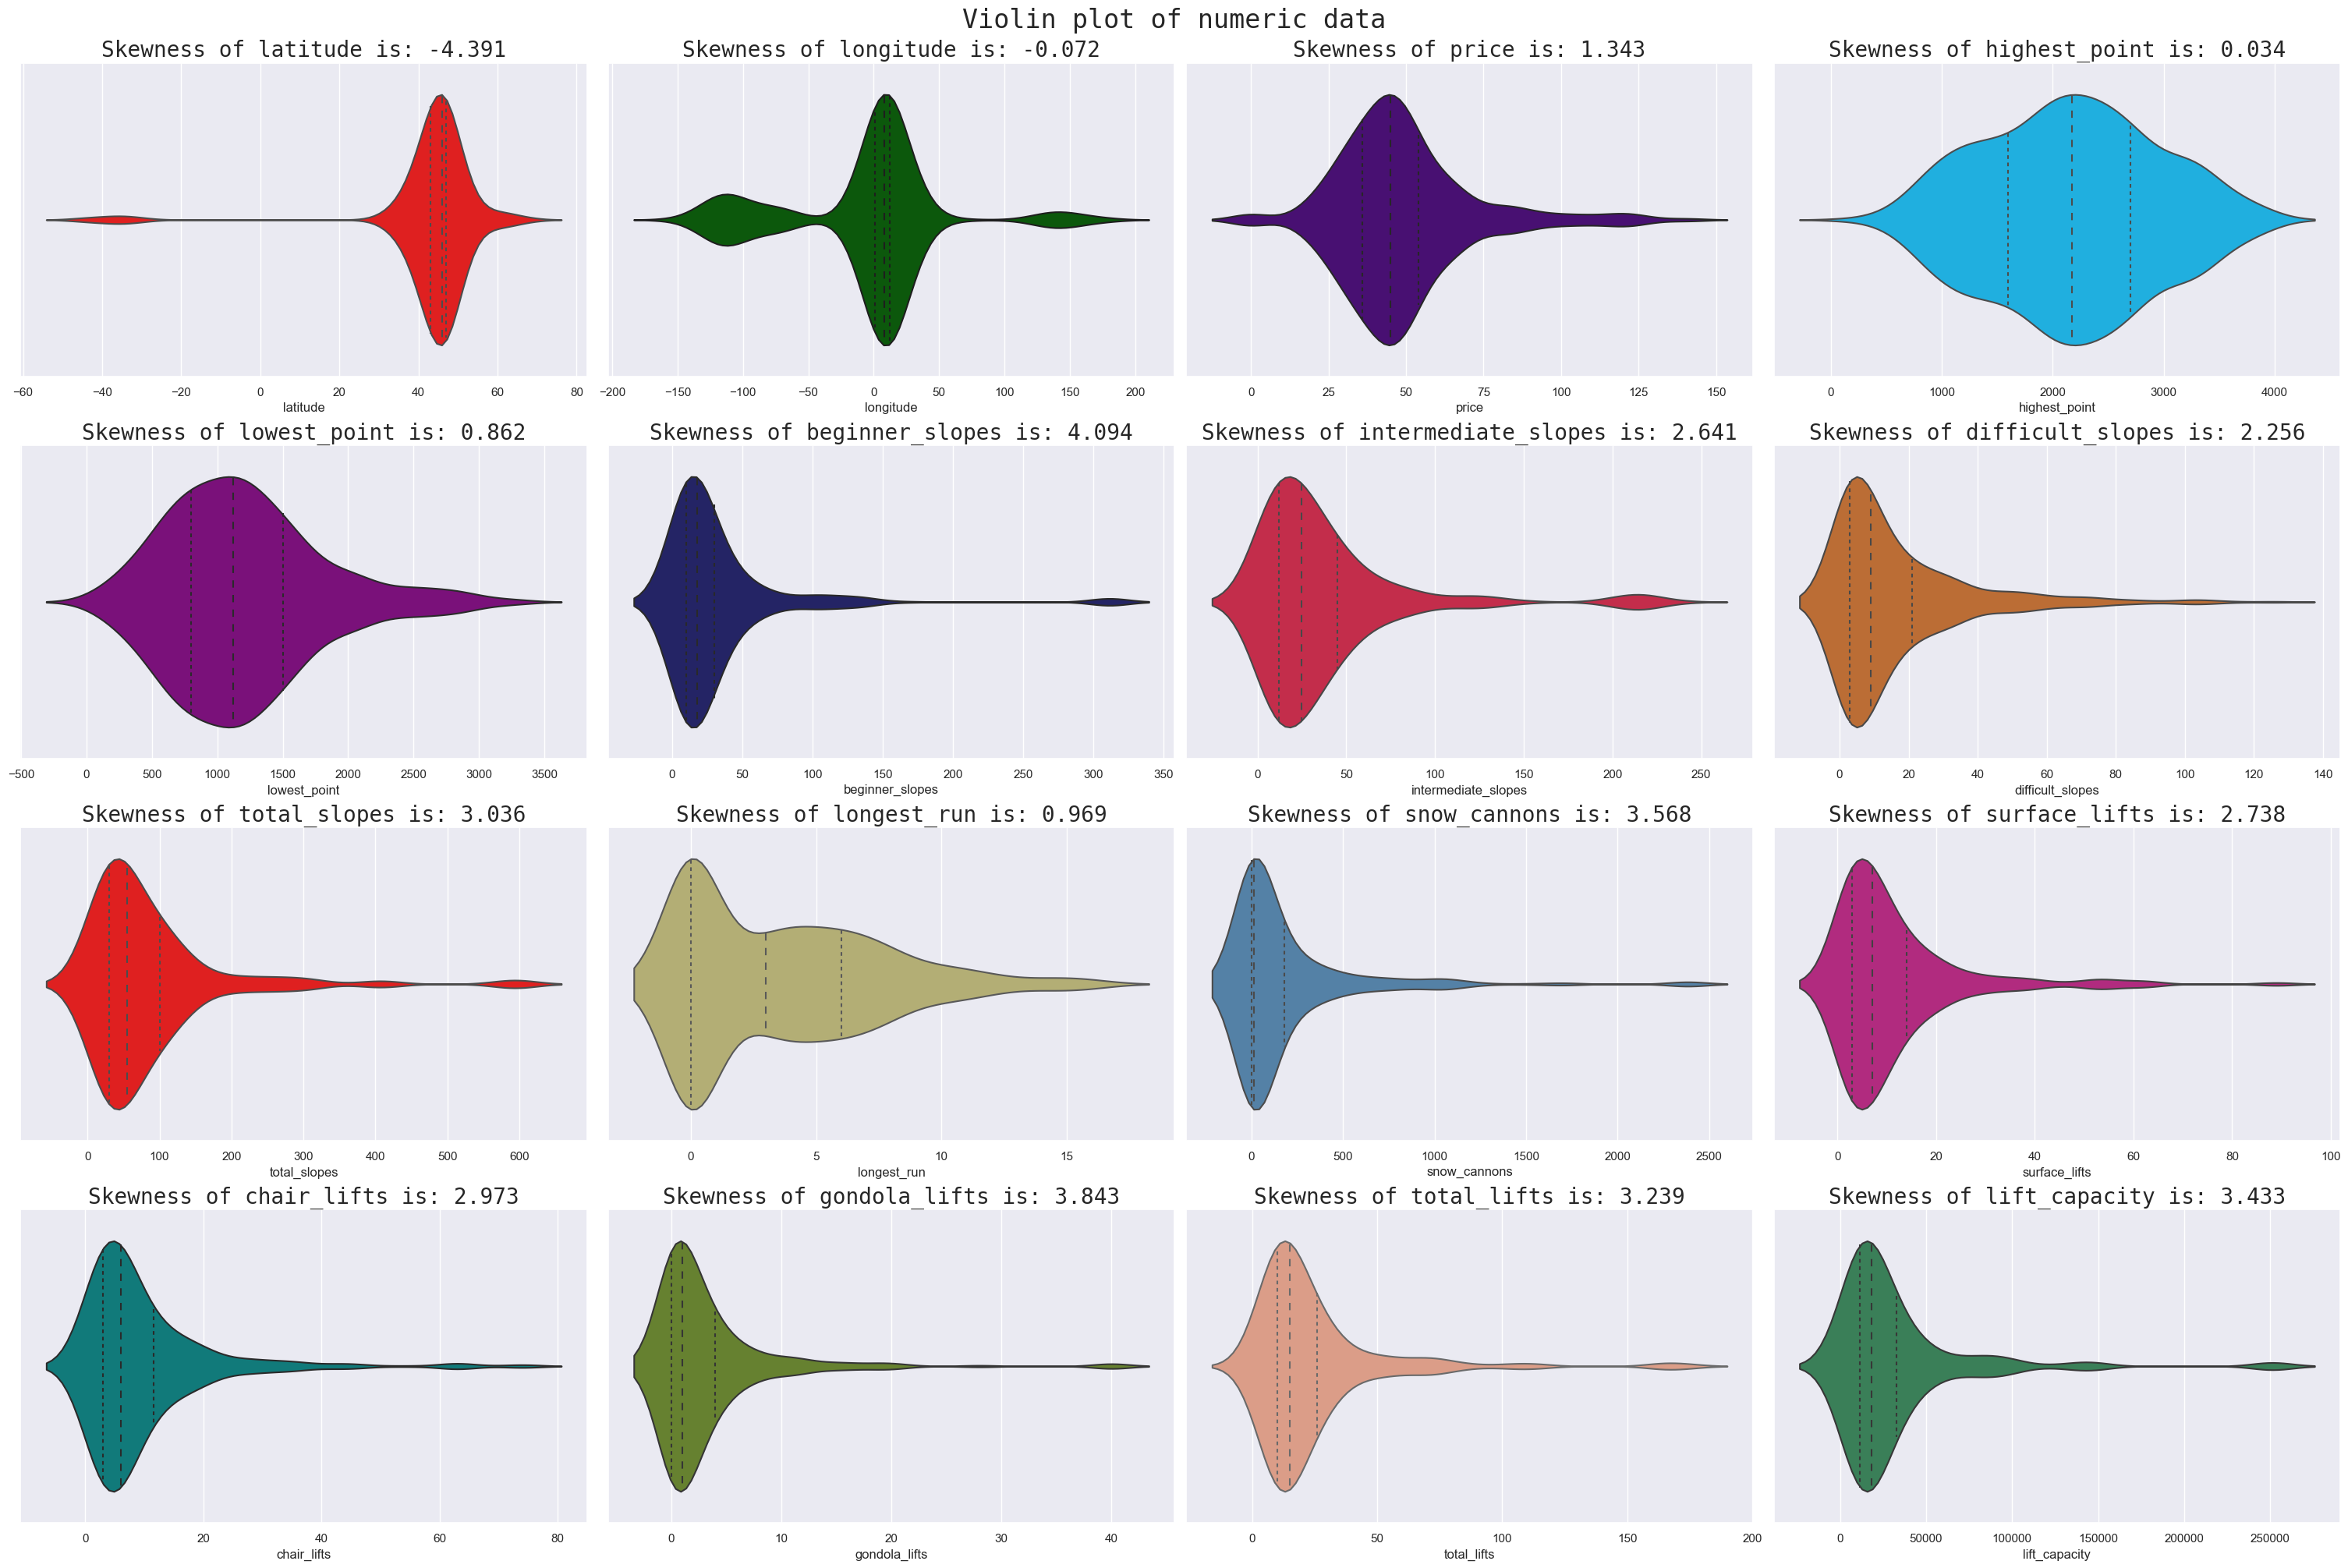

In [122]:
fig, axs = plt.subplots(4, 4, figsize=(30, 20), constrained_layout=True)
axs = axs.ravel()

colors_list = ['red', 'darkgreen', 'indigo', 'deepskyblue',
               'darkmagenta', 'midnightblue', 'crimson', 'chocolate',
               'red', 'darkkhaki', 'steelblue', 'mediumvioletred',
               'darkcyan', 'olivedrab', 'darksalmon', 'seagreen']

sns.set_theme(style='darkgrid')

for index, value in enumerate(nums):
    sns.violinplot(data=nums, x=value, color=colors_list[index],
                   ax=axs[index], inner='quartile')
    axs[index].set_title(f'Skewness of {value} is: {np.around(nums[value].skew(axis=0), 3)}', fontdict=fonts2)

fig.suptitle("Violin plot of numeric data", fontdict=fonts1, fontsize=24)


Observation

Histogram

There is a high concentration of prices between 20 - 60
Both highest_point & lowest_point seems be guassian in nature; evenly distributed
beginner_slopes, intermediate_slopes, difficult_slopes & total slopes are all positively skewed
snow_cannons, surface_lifts, chair_lifts, gondola_lifts, total_lifts, lift_capacity are all heavily positivvely skewed.
Boxen Plots

Few price outliers from 120
High variance can be seen in beginner_slopes,intermediate_slopes, total_slopes, total_lifts & lift_capacity

## Exporting new data

In [125]:
# Excel
import os

if not os.path.exists('my_data'):
    os.makedirs('my_data')
with pd.ExcelWriter('my_data/ski_resort_snow.xlsx') as writer:  
    analysis_resorts.to_excel(writer,index=False,sheet_name='resorts')
    analysis_snow.to_excel(writer,index=False,sheet_name='snow')
    